In [81]:
import os
import pandas as pd

In [82]:
os.getcwd()

'/Users/bkannadasan/Documents/GitHub/DataScience/MachineLearning/Randomforest'

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve,auc


In [84]:
data = pd.read_csv('creditcard.csv')

In [85]:
data.shape

(284807, 31)

In [86]:
data

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284807 rows x 31 columns]

In [87]:
data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [88]:
data.shape

(284807, 31)

In [89]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [91]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [92]:
data['Class'].value_counts(normalize=True)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

<Axes: xlabel='Class'>

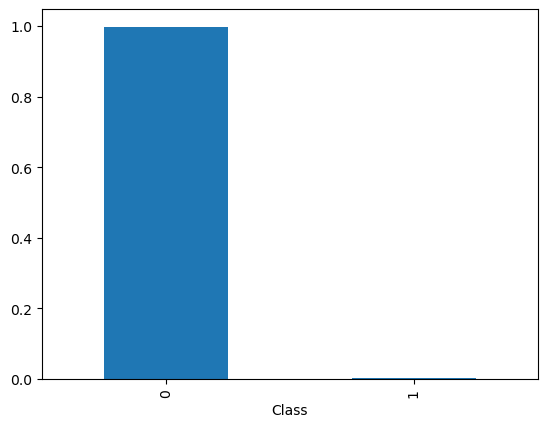

In [93]:
data['Class'].value_counts(normalize=True).plot(kind='bar')

In [94]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [95]:
X=data.drop(columns='Class')

In [96]:
X.columns,type(X)

(Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
        'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
        'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
       dtype='object'),
 pandas.core.frame.DataFrame)

In [97]:
y=data['Class']

In [98]:
y.head(),type(y)

(0    0
 1    0
 2    0
 3    0
 4    0
 Name: Class, dtype: int64,
 pandas.core.series.Series)

In [99]:
train_X,test_X,train_y,test_y= train_test_split(X,y,test_size=0.2,random_state=42)

In [100]:
train_X.shape,test_X.shape,train_y.shape,test_y.shape

((227845, 30), (56962, 30), (227845,), (56962,))

In [101]:
train_y.value_counts(), test_y.value_counts()

(Class
 0    227451
 1       394
 Name: count, dtype: int64,
 Class
 0    56864
 1       98
 Name: count, dtype: int64)

In [102]:
train_y.value_counts(normalize=True), test_y.value_counts(normalize=True)

(Class
 0    0.998271
 1    0.001729
 Name: proportion, dtype: float64,
 Class
 0    0.99828
 1    0.00172
 Name: proportion, dtype: float64)

In [103]:
unblalaced_decision_tree = DecisionTreeClassifier()

In [104]:
unblalaced_decision_tree.fit(train_X,train_y)

DecisionTreeClassifier()

In [105]:
unblalaced_dt_pred_train = unblalaced_decision_tree.predict(train_X)
unblalaced_dt_pred_test = unblalaced_decision_tree.predict(test_X)

In [106]:
unblalaced_dt_pred_train.shape,unblalaced_dt_pred_test.shape

((227845,), (56962,))

In [107]:
print("Train Accuracy : ",accuracy_score(train_y, unblalaced_dt_pred_train))
print("Test Accuracy : ",accuracy_score(test_y, unblalaced_dt_pred_test))

Train Accuracy :  1.0
Test Accuracy :  0.9991222218320986


In [108]:
print("Train Report: ",classification_report(train_y, unblalaced_dt_pred_train))
print("Test Report: ",classification_report(test_y, unblalaced_dt_pred_test))

Train Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845

Test Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.83      0.76        98

    accuracy                           1.00     56962
   macro avg       0.86      0.91      0.88     56962
weighted avg       1.00      1.00      1.00     56962



In [109]:
def model_pred_result (train_X,test_X,train_y,test_y,model):
    model.fit(train_X,train_y)
    train_pred = model.predict(train_X)
    test_pred = model.predict(test_X)
    print("Train Accuracy : ",accuracy_score(train_y, train_pred))
    print("Test Accuracy : ",accuracy_score(test_y, test_pred))  
    print("Train Report: ",classification_report(train_y, train_pred))
    print("Test Report: ",classification_report(test_y, test_pred))
    print("Train Confusion. Matrix : \n",confusion_matrix(train_y, train_pred))
    print("Test Confusion. Matrix  : \n",confusion_matrix(test_y, test_pred))
    print("TRAIN ROC AUC SCORE  : \n",roc_auc_score(train_y, train_pred))
    print("Test ROC AUC SCORE  : \n",roc_auc_score(test_y, test_pred))
    
    y_pred_proba = model.predict_proba(test_X)[:,1]
    # return y_pred_proba
    fpr, tpr, thresholds = roc_curve(test_y, y_pred_proba) 
    
    roc_auc = auc(fpr, tpr)

    plt.figure()  
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    # plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Fraudulent Transaction Classification')
    plt.legend()
    plt.show()
    
    return accuracy_score(train_y, train_pred), accuracy_score(test_y, test_pred)
    

Train Accuracy :  1.0
Test Accuracy :  0.9990695551420246
Train Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845

Test Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.77      0.74        98

    accuracy                           1.00     56962
   macro avg       0.86      0.88      0.87     56962
weighted avg       1.00      1.00      1.00     56962

Train Confusion. Matrix : 
 [[227451      0]
 [     0    394]]
Test Confusion. Matrix  : 
 [[56834    30]
 [   23    75]]
TRAIN ROC AUC SCORE  : 
 1.0
Test ROC AUC SCORE  : 
 0.882389273942554


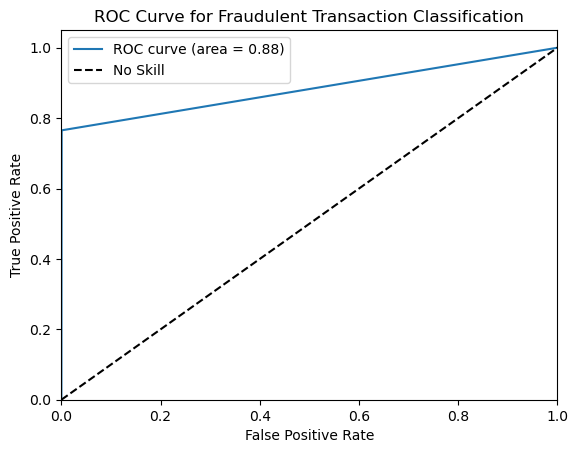

CPU times: user 13.4 s, sys: 105 ms, total: 13.5 s
Wall time: 13.7 s


In [110]:
%%time
decision_unbalanced_model = DecisionTreeClassifier()
train_accuracy, test_accuracy = model_pred_result(train_X, test_X, train_y, test_y, decision_unbalanced_model)

Train Accuracy :  1.0
Test Accuracy :  0.9995962220427653
Train Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845

Test Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.79      0.87        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Train Confusion. Matrix : 
 [[227451      0]
 [     0    394]]
Test Confusion. Matrix  : 
 [[56862     2]
 [   21    77]]
TRAIN ROC AUC SCORE  : 
 1.0
Test ROC AUC SCORE  : 
 0.892839557038347


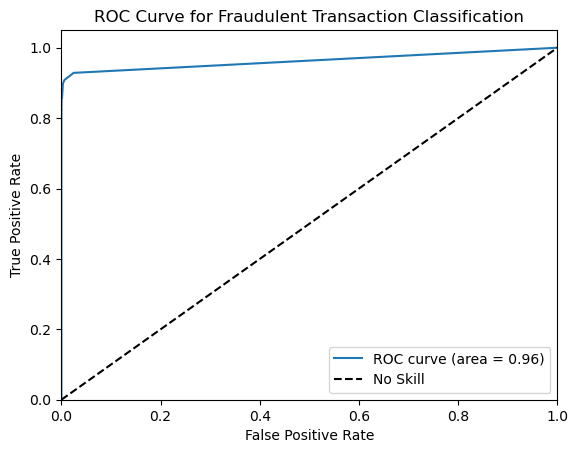

CPU times: user 2min 29s, sys: 828 ms, total: 2min 30s
Wall time: 2min 31s


In [111]:
%%time
RandomForestClassifier_unbalanced_model = RandomForestClassifier()
train_accuracy, test_accuracy = model_pred_result(train_X, test_X, train_y, test_y, RandomForestClassifier_unbalanced_model)

In [112]:
data.corr()

Time            V1            V2            V3            V4  \
Time    1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
V1      0.117396  1.000000e+00  4.188326e-16 -1.164018e-15 -9.082889e-16   
V2     -0.010593  4.188326e-16  1.000000e+00  3.140164e-16 -1.125909e-15   
V3     -0.419618 -1.164018e-15  3.140164e-16  1.000000e+00  4.644369e-16   
V4     -0.105260 -9.082889e-16 -1.125909e-15  4.644369e-16  1.000000e+00   
V5      0.173072  2.085924e-17  5.230686e-16 -5.483554e-17 -1.722056e-15   
V6     -0.063016 -6.343731e-16  2.781752e-16  1.627805e-15 -7.565957e-16   
V7      0.084714 -1.018099e-15  1.857398e-16  5.239200e-16 -4.188169e-16   
V8     -0.036949 -2.557889e-16 -5.698764e-17 -1.297365e-15  5.645256e-16   
V9     -0.008660 -1.347621e-16  2.006267e-17  5.725902e-16  6.873528e-16   
V10     0.030617  7.340779e-17 -3.930237e-16  1.157736e-15  2.203905e-16   
V11    -0.247689  2.248163e-16  1.965104e-16  1.603095e-15  3.498520e-16   
V12     0.124348  1.872282e-16 -9.856214e-17  6.467469e-16 -5.618322e-16   
V13    -0.065902 -2.073002e-17  6.198203e-16  2.994011e-16  1.154166e-16   
V14    -0.098757 -4.976104e-16 -1.650479e-16  4.679099e-16  2.174482e-16   
V15    -0.183453  3.407344e-16 -3.585606e-17  8.922513e-16  1.538485e-16   
V16     0.011903  7.096369e-17  8.030147e-18  8.324900e-16 -9.619339e-16   
V17    -0.073297 -3.867239e-16 -2.811795e-16  7.272949e-16 -2.708216e-16   
V18     0.090438  3.545842e-17  3.316578e-16  1.516723e-16 -5.023217e-16   
V19     0.028975  1.480546e-16 -2.891532e-18  3.408492e-16 -4.042137e-16   
V20    -0.050866  4.551909e-16  2.405781e-16 -9.303429e-16 -1.808934e-16   
V21     0.044736 -2.444306e-16 -8.277282e-17  5.931009e-17 -1.862123e-16   
V22     0.144059 -4.201199e-16  1.547272e-16 -1.115726e-15 -3.949686e-17   
V23     0.051142  6.217312e-16  1.668081e-16 -5.063673e-16  9.564529e-17   
V24    -0.016182 -4.385333e-17  1.577058e-17  5.605700e-19  1.569977e-16   
V25    -0.233083 -9.832396e-16 -4.530958e-16 -1.118857e-15  6.026069e-16   
V26    -0.041407 -1.745526e-17  1.984817e-16 -1.389572e-16 -4.237973e-16   
V27    -0.005135  1.196577e-16 -4.938067e-16  1.058098e-15  4.577343e-17   
V28    -0.009413  2.108702e-15 -5.182198e-16  9.792787e-16 -3.888959e-18   
Amount -0.010596 -2.277087e-01 -5.314089e-01 -2.108805e-01  9.873167e-02   
Class  -0.012323 -1.013473e-01  9.128865e-02 -1.929608e-01  1.334475e-01   

                  V5            V6            V7            V8            V9  \
Time    1.730721e-01 -6.301647e-02  8.471437e-02 -3.694943e-02 -8.660434e-03   
V1      2.085924e-17 -6.343731e-16 -1.018099e-15 -2.557889e-16 -1.347621e-16   
V2      5.230686e-16  2.781752e-16  1.857398e-16 -5.698764e-17  2.006267e-17   
V3     -5.483554e-17  1.627805e-15  5.239200e-16 -1.297365e-15  5.725902e-16   
V4     -1.722056e-15 -7.565957e-16 -4.188169e-16  5.645256e-16  6.873528e-16   
V5      1.000000e+00  2.208263e-16  2.691713e-16  7.396815e-16  7.178142e-16   
V6      2.208263e-16  1.000000e+00  1.213776e-16 -1.030439e-16  4.234240e-16   
V7      2.691713e-16  1.213776e-16  1.000000e+00  3.549393e-16  1.125386e-15   
V8      7.396815e-16 -1.030439e-16  3.549393e-16  1.000000e+00  4.340695e-16   
V9      7.178142e-16  4.234240e-16  1.125386e-15  4.340695e-16  1.000000e+00   
V10    -5.150417e-16  6.292371e-17 -6.747856e-17 -2.687451e-16 -4.638448e-16   
V11     7.178417e-16  1.975490e-15  1.397214e-16  2.461364e-16  1.478453e-16   
V12     7.494775e-16  2.375485e-16  7.917833e-18  1.794939e-16 -1.107815e-15   
V13     5.689265e-16 -1.228256e-16  7.979500e-18 -2.972764e-16  2.244447e-15   
V14     6.594732e-16  2.594114e-16  2.533679e-16 -8.682575e-16  3.780984e-15   
V15    -8.742428e-16 -1.554341e-15 -1.726649e-16  4.062053e-16 -1.049864e-15   
V16     2.218522e-15  1.520999e-17  4.920492e-17 -5.332093e-16 -1.207464e-15   
V17     1.334374e-16  2.052321e-16  2.164087e-16 -2.297206e-16  1.124733e-15   
V18     5.248944e-16  1.209863e-16  6.897292e-17 -3.718821e

In [113]:
print(sns.__version__)

0.13.2


<Axes: >

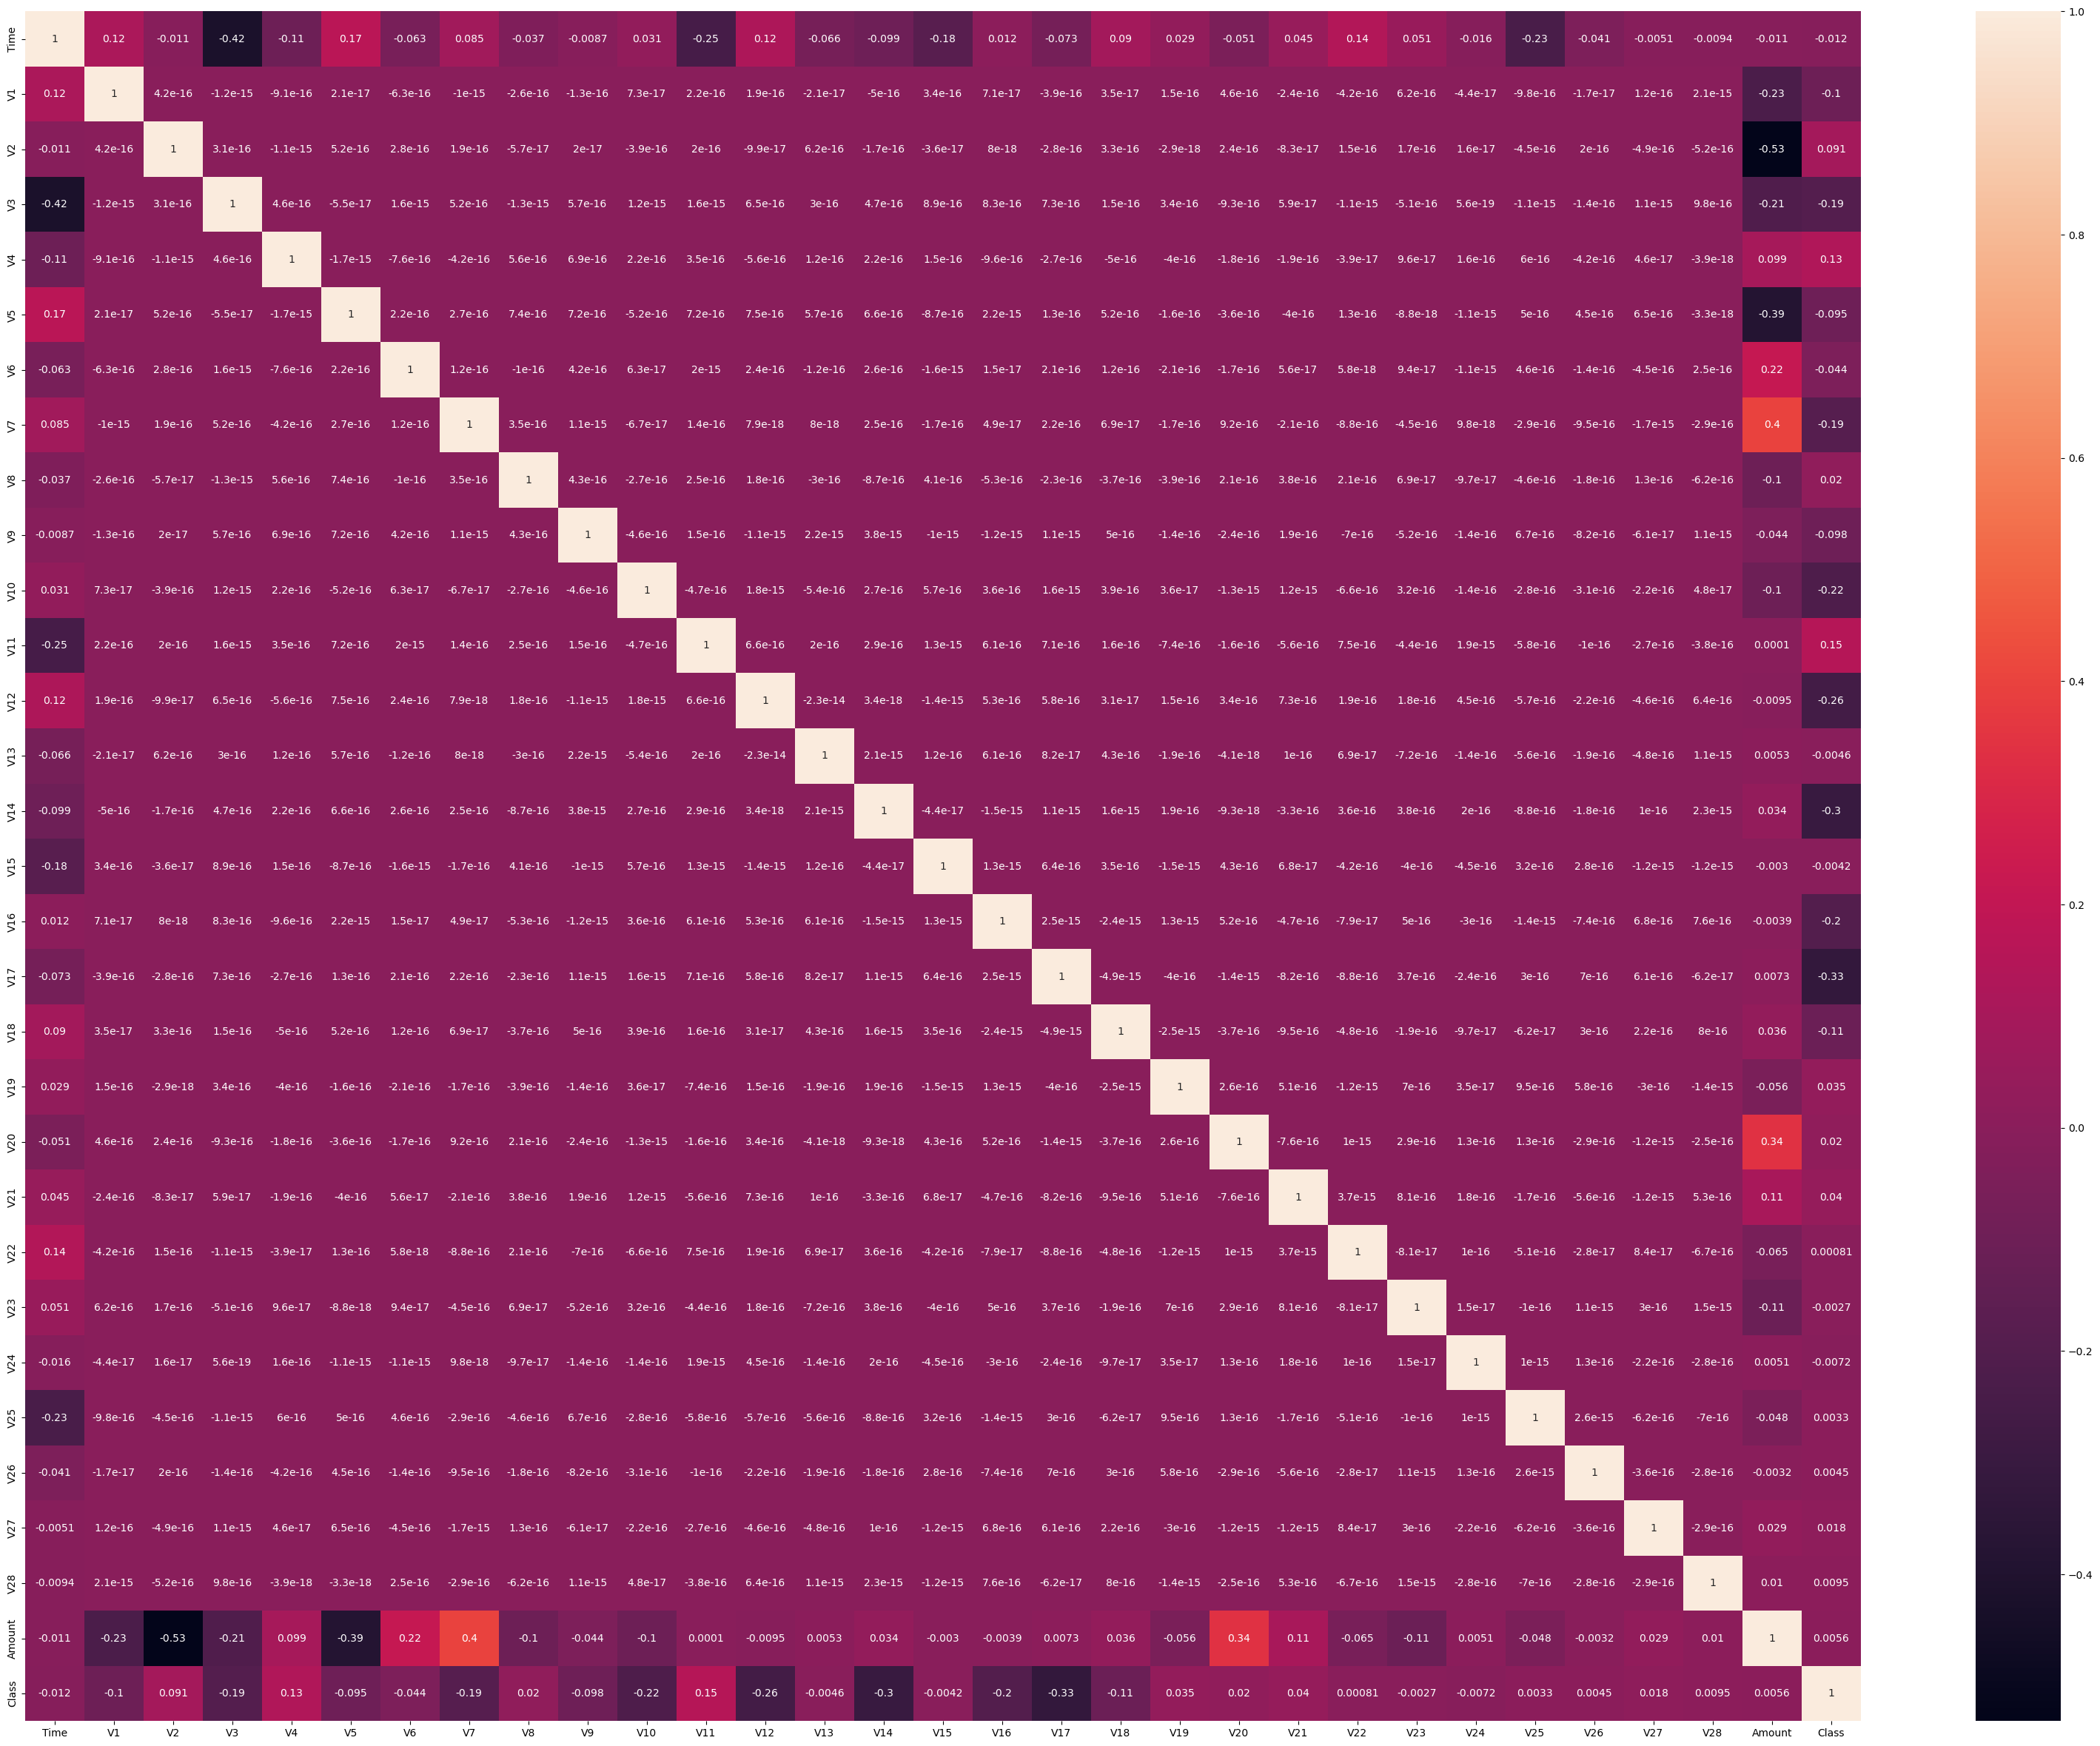

In [114]:
plt.figure(figsize=(40,30))
sns.heatmap(data.corr(),annot=True)

In [115]:
print(sns.__version__)

0.13.2


In [116]:
import sys
print(sys.version)

3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 08:22:19) [Clang 14.0.6 ]


In [117]:
sns.__version__

'0.13.2'

In [118]:
scale = StandardScaler()

In [119]:
X_Scaled = pd.DataFrame(scale.fit_transform(X),columns=X.columns)

In [120]:
X_Scaled.head()

Time        V1        V2        V3        V4        V5        V6  \
0 -1.996583 -0.694242 -0.044075  1.672773  0.973366 -0.245117  0.347068   
1 -1.996583  0.608496  0.161176  0.109797  0.316523  0.043483 -0.061820   
2 -1.996562 -0.693500 -0.811578  1.169468  0.268231 -0.364572  1.351454   
3 -1.996562 -0.493325 -0.112169  1.182516 -0.609727 -0.007469  0.936150   
4 -1.996541 -0.591330  0.531541  1.021412  0.284655 -0.295015  0.071999   

         V7        V8        V9  ...       V20       V21       V22       V23  \
0  0.193679  0.082637  0.331128  ...  0.326118 -0.024923  0.382854 -0.176911   
1 -0.063700  0.071253 -0.232494  ... -0.089611 -0.307377 -0.880077  0.162201   
2  0.639776  0.207373 -1.378675  ...  0.680975  0.337632  1.063358  1.456320   
3  0.192071  0.316018 -1.262503  ... -0.269855 -0.147443  0.007267 -0.304777   
4  0.479302 -0.226510  0.744326  ...  0.529939 -0.012839  1.100011 -0.220123   

        V24       V25       V26       V27       V28    Amount  
0  0.110507  0.246585 -0.392170  0.330892 -0.063781  0.244964  
1 -0.561131  0.320694  0.261069 -0.022256  0.044608 -0.342475  
2 -1.138092 -0.628537 -0.288447 -0.137137 -0.181021  1.160686  
3 -1.941027  1.241904 -0.460217  0.155396  0.186189  0.140534  
4  0.233250 -0.395202  1.041611  0.543620  0.651816 -0.073403  

[5 rows x 30 columns]

In [121]:
data_scaled = pd.concat([X_Scaled,y])

In [122]:
data_scaled

Time        V1        V2        V3        V4        V5        V6  \
0      -1.996583 -0.694242 -0.044075  1.672773  0.973366 -0.245117  0.347068   
1      -1.996583  0.608496  0.161176  0.109797  0.316523  0.043483 -0.061820   
2      -1.996562 -0.693500 -0.811578  1.169468  0.268231 -0.364572  1.351454   
3      -1.996562 -0.493325 -0.112169  1.182516 -0.609727 -0.007469  0.936150   
4      -1.996541 -0.591330  0.531541  1.021412  0.284655 -0.295015  0.071999   
...          ...       ...       ...       ...       ...       ...       ...   
284802       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
284803       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
284804       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
284805       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
284806       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

              V7        V8        V9  ...       V21       V22       V23  \
0       0.193679  0.082637  0.331128  ... -0.024923  0.382854 -0.176911   
1      -0.063700  0.071253 -0.232494  ... -0.307377 -0.880077  0.162201   
2       0.639776  0.207373 -1.378675  ...  0.337632  1.063358  1.456320   
3       0.192071  0.316018 -1.262503  ... -0.147443  0.007267 -0.304777   
4       0.479302 -0.226510  0.744326  ... -0.012839  1.100011 -0.220123   
...          ...       ...       ...  ...       ...       ...       ...   
284802       NaN       NaN       NaN  ...       NaN       NaN       NaN   
284803       NaN       NaN       NaN  ...       NaN       NaN       NaN   
284804       NaN       NaN       NaN  ...       NaN       NaN       NaN   
284805       NaN       NaN       NaN  ...       NaN       NaN       NaN   
284806       NaN       NaN       NaN  ...       NaN       NaN       NaN   

             V24       V25       V26       V27       V28    Amount  Class  
0       0.110507  0.246585 -0.392170  0.330892 -0.063781  0.244964    NaN  
1      -0.561131  0.320694  0.261069 -0.022256  0.044608 -0.342475    NaN  
2      -1.138092 -0.628537 -0.288447 -0.137137 -0.181021  1.160686    NaN  
3      -1.941027  1.241904 -0.460217  0.155396  0.186189  0.140534    NaN  
4       0.233250 -0.395202  1.041611  0.543620  0.651816 -0.073403    NaN  
...          ...       ...       ...       ...       ...       ...    ...  
284802       NaN       NaN       NaN       NaN       NaN       NaN    0.0  
284803       NaN       NaN       NaN       NaN       NaN       NaN    0.0  
284804       NaN       NaN       NaN       NaN       NaN       NaN    0.0  
284805       NaN       NaN       NaN       NaN       NaN       NaN    0.0  
284806       NaN       NaN       NaN       NaN       NaN       NaN    0.0  

[569614 rows x 31 columns]

In [123]:
data_scaled = pd.concat([X_Scaled,y],axis=1)

In [124]:
data_scaled

Time        V1        V2        V3        V4        V5        V6  \
0      -1.996583 -0.694242 -0.044075  1.672773  0.973366 -0.245117  0.347068   
1      -1.996583  0.608496  0.161176  0.109797  0.316523  0.043483 -0.061820   
2      -1.996562 -0.693500 -0.811578  1.169468  0.268231 -0.364572  1.351454   
3      -1.996562 -0.493325 -0.112169  1.182516 -0.609727 -0.007469  0.936150   
4      -1.996541 -0.591330  0.531541  1.021412  0.284655 -0.295015  0.071999   
...          ...       ...       ...       ...       ...       ...       ...   
284802  1.641931 -6.065842  6.099286 -6.486245 -1.459641 -3.886611 -1.956690   
284803  1.641952 -0.374121 -0.033356  1.342145 -0.521651  0.629040  0.794446   
284804  1.641974  0.980024 -0.182434 -2.143205 -0.393984  1.905833  2.275262   
284805  1.641974 -0.122755  0.321250  0.463320  0.487192 -0.273836  0.468155   
284806  1.642058 -0.272331 -0.114899  0.463866 -0.357570 -0.009089 -0.487602   

              V7        V8        V9  ...       V21       V22       V23  \
0       0.193679  0.082637  0.331128  ... -0.024923  0.382854 -0.176911   
1      -0.063700  0.071253 -0.232494  ... -0.307377 -0.880077  0.162201   
2       0.639776  0.207373 -1.378675  ...  0.337632  1.063358  1.456320   
3       0.192071  0.316018 -1.262503  ... -0.147443  0.007267 -0.304777   
4       0.479302 -0.226510  0.744326  ... -0.012839  1.100011 -0.220123   
...          ...       ...       ...  ...       ...       ...       ...   
284802 -3.975628  6.116573  1.742559  ...  0.290602  0.154146  1.624574   
284803  0.019667  0.246886  0.532299  ...  0.291625  1.273781  0.019958   
284804 -0.239939  0.593140  0.393630  ...  0.315913  0.796788 -0.060053   
284805 -0.554672  0.568631  0.356887  ...  0.361112  1.102451 -0.261503   
284806  1.274769 -0.347176  0.442532  ...  0.355411  0.886149  0.603365   

             V24       V25       V26       V27       V28    Amount  Class  
0       0.110507  0.246585 -0.392170  0.330892 -0.063781  0.244964      0  
1      -0.561131  0.320694  0.261069 -0.022256  0.044608 -0.342475      0  
2      -1.138092 -0.628537 -0.288447 -0.137137 -0.181021  1.160686      0  
3      -1.941027  1.241904 -0.460217  0.155396  0.186189  0.140534      0  
4       0.233250 -0.395202  1.041611  0.543620  0.651816 -0.073403      0  
...          ...       ...       ...       ...       ...       ...    ...  
284802 -0.841000  2.756320  0.518500  2.337901  2.495529 -0.350151      0  
284803 -1.677920 -1.163726 -0.819647  0.169641 -0.162164 -0.254117      0  
284804  1.056944  0.509797 -0.181182  0.011037 -0.080467 -0.081839      0  
284805  0.203428 -1.091855  1.133635  0.269604  0.316687 -0.313249      0  
284806  0.014526 -0.908631 -1.696853 -0.005984  0.041350  0.514355      0  

[284807 rows x 31 columns]

In [125]:
sns.__version__

'0.13.2'

In [126]:
sns.__version__

'0.13.2'

<Axes: >

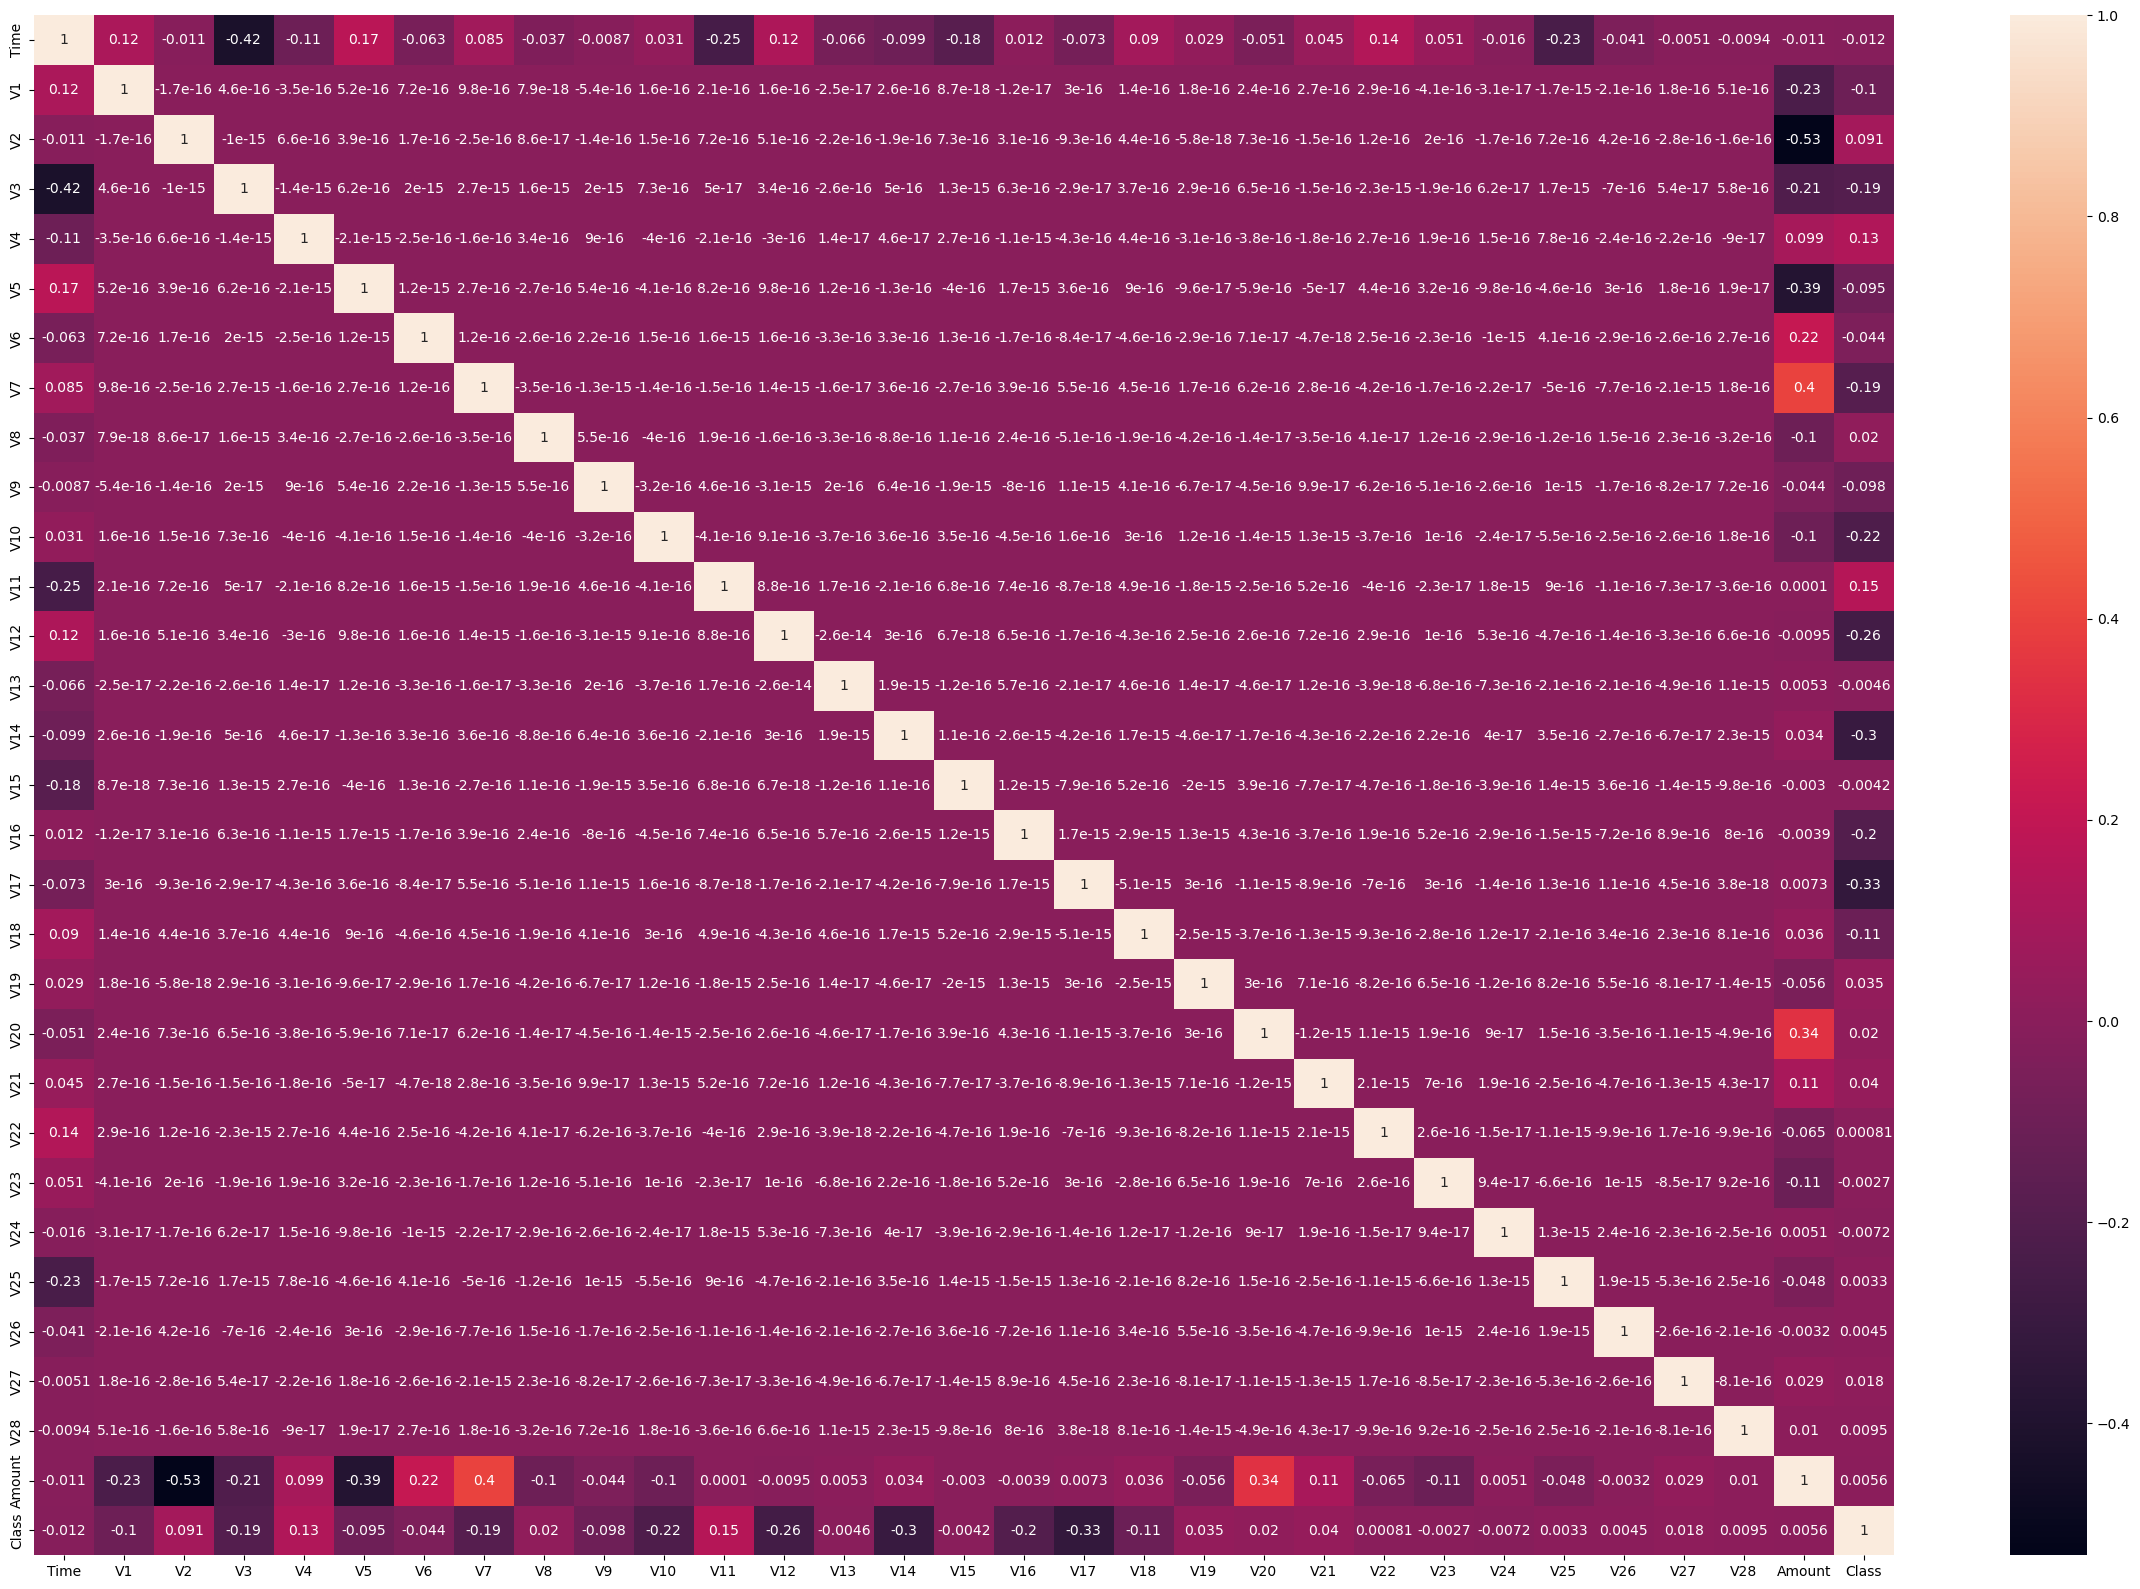

In [127]:
plt.figure(figsize=(30,20))
sns.heatmap(data_scaled.corr(),annot=True)

In [128]:
train_scaled_X, test_scaled_X,train_y, test_y = train_test_split(X_Scaled, y, test_size=0.2, random_state=32)

In [129]:
train_scaled_X.shape, test_scaled_X.shape, train_y.shape, test_y.shape

((227845, 30), (56962, 30), (227845,), (56962,))

In [130]:
under_sampling = RandomUnderSampler()

In [131]:
train_y.value_counts()

Class
0    227465
1       380
Name: count, dtype: int64

In [132]:
train_scaled_us_X,train_scaled_us_y = under_sampling.fit_resample(train_scaled_X,train_y)

In [133]:
train_scaled_us_X.shape,train_scaled_us_y.shape

((760, 30), (760,))

In [134]:
train_scaled_us_y.value_counts()

Class
0    380
1    380
Name: count, dtype: int64

In [135]:
type(train_scaled_us_y)

pandas.core.series.Series

In [136]:
train_data_scaled_undersample = pd.concat([train_scaled_us_X,train_scaled_us_y])


In [137]:
train_data_scaled_undersample

Time        V1        V2        V3        V4        V5        V6  \
137928 -0.261431 -0.525225 -0.075971  0.606403 -0.374792 -0.667362  0.259046   
2835   -1.945791 -0.284974  0.287959  1.635192  0.715672 -0.220336  0.459220   
89978  -0.673766  0.678997  0.059932  0.096822 -0.016531 -0.185103 -0.566938   
86200  -0.709291 -0.358167  0.418995  1.282195  0.405525  0.430596  0.878636   
247100  1.234840 -1.360777 -1.047717  0.218326 -0.153778  2.792003 -1.294819   
...          ...       ...       ...       ...       ...       ...       ...   
154697       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
153823       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
181966       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
150601       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
6338         NaN       NaN       NaN       NaN       NaN       NaN       NaN   

              V7        V8        V9  ...       V21       V22       V23  \
137928  0.238017  0.383447 -1.015126  ... -0.032163  0.025809  0.361278   
2835   -0.163424  0.363735 -0.076502  ...  0.218024  0.869325 -0.050606   
89978   0.010824 -0.214481  0.095544  ...  0.052833  0.299430 -0.240660   
86200   0.090019  0.323262 -0.683722  ...  0.425577  1.242392 -0.738104   
247100 -0.199095 -0.308807  0.159431  ... -0.697404 -1.268004 -0.560551   
...          ...       ...       ...  ...       ...       ...       ...   
154697       NaN       NaN       NaN  ...       NaN       NaN       NaN   
153823       NaN       NaN       NaN  ...       NaN       NaN       NaN   
181966       NaN       NaN       NaN  ...       NaN       NaN       NaN   
150601       NaN       NaN       NaN  ...       NaN       NaN       NaN   
6338         NaN       NaN       NaN  ...       NaN       NaN       NaN   

             V24       V25       V26       V27       V28    Amount  Class  
137928 -1.096633  0.002768 -0.807620  0.017532  0.259730  0.438392    NaN  
2835    0.379825 -0.931461 -0.802358  0.543136  0.468494 -0.301294    NaN  
89978  -0.039790  0.981162  2.372763 -0.186551 -0.005518 -0.336278    NaN  
86200  -1.835148  0.910117  0.033777  0.274488  0.203545 -0.241683    NaN  
247100  0.393564 -0.167141  0.298690 -0.775624  0.807793 -0.344114    NaN  
...          ...       ...       ...       ...       ...       ...    ...  
154697       NaN       NaN       NaN       NaN       NaN       NaN    1.0  
153823       NaN       NaN       NaN       NaN       NaN       NaN    1.0  
181966       NaN       NaN       NaN       NaN       NaN       NaN    1.0  
150601       NaN       NaN       NaN       NaN       NaN       NaN    1.0  
6338         NaN       NaN       NaN       NaN       NaN       NaN    1.0  

[1520 rows x 31 columns]

In [138]:
train_data_scaled_undersample.shape

(1520, 31)

In [139]:
train_data_scaled_undersample = pd.concat([train_scaled_us_X,train_scaled_us_y],axis=1)

In [140]:
train_data_scaled_undersample.shape

(760, 31)

In [141]:
train_data_scaled_undersample['Class'].value_counts()

Class
0    380
1    380
Name: count, dtype: int64

In [142]:
type(train_data_scaled_undersample['Class'])

pandas.core.series.Series

In [143]:
train_data_scaled_undersample['Class'].dtype

dtype('int64')

In [144]:
train_data_scaled_undersample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 760 entries, 137928 to 6338
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    760 non-null    float64
 1   V1      760 non-null    float64
 2   V2      760 non-null    float64
 3   V3      760 non-null    float64
 4   V4      760 non-null    float64
 5   V5      760 non-null    float64
 6   V6      760 non-null    float64
 7   V7      760 non-null    float64
 8   V8      760 non-null    float64
 9   V9      760 non-null    float64
 10  V10     760 non-null    float64
 11  V11     760 non-null    float64
 12  V12     760 non-null    float64
 13  V13     760 non-null    float64
 14  V14     760 non-null    float64
 15  V15     760 non-null    float64
 16  V16     760 non-null    float64
 17  V17     760 non-null    float64
 18  V18     760 non-null    float64
 19  V19     760 non-null    float64
 20  V20     760 non-null    float64
 21  V21     760 non-null    float64
 22  V

In [145]:
train_data_scaled_undersample['Class'].value_counts()

Class
0    380
1    380
Name: count, dtype: int64

<Axes: xlabel='Class'>

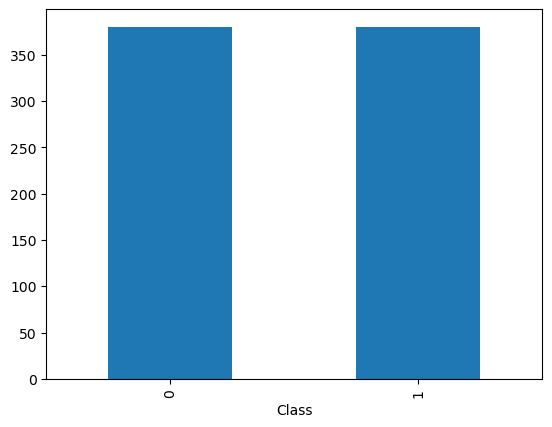

In [146]:
train_data_scaled_undersample['Class'].value_counts().plot(kind='bar')

<Axes: >

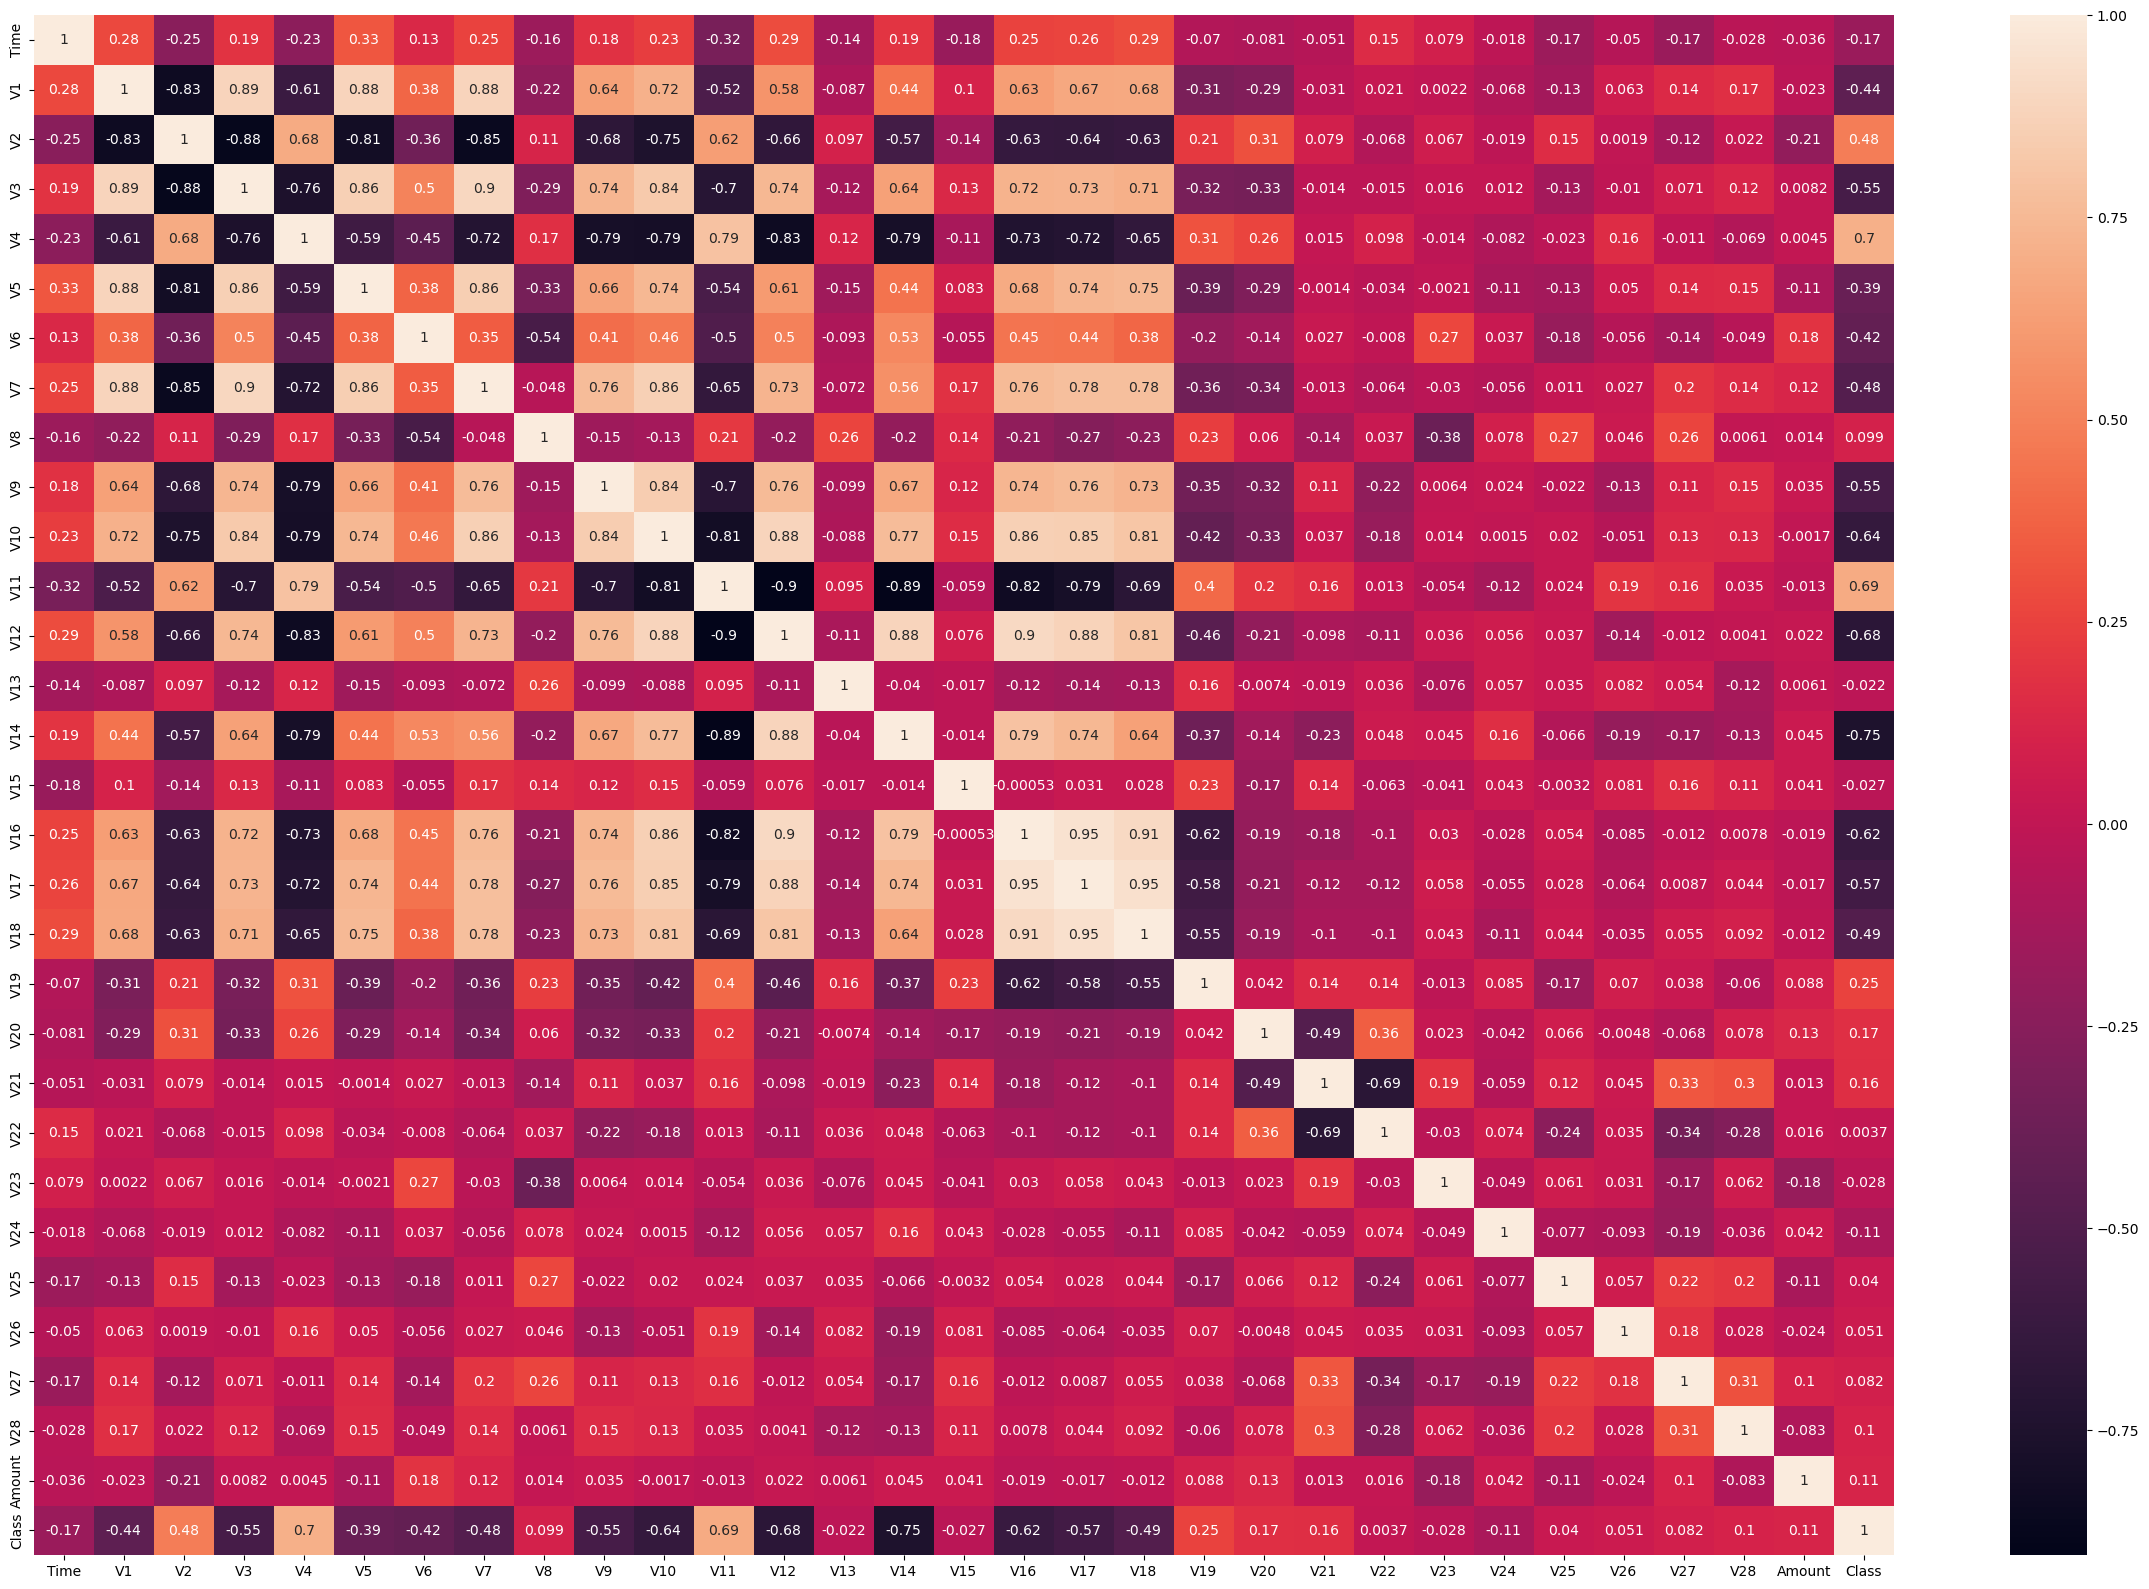

In [147]:
plt.figure(figsize=(30,20))
sns.heatmap(train_data_scaled_undersample.corr(),annot=True)

In [148]:
train_scaled_us_X

Time         V1        V2         V3        V4         V5  \
137928 -0.261431  -0.525225 -0.075971   0.606403 -0.374792  -0.667362   
2835   -1.945791  -0.284974  0.287959   1.635192  0.715672  -0.220336   
89978  -0.673766   0.678997  0.059932   0.096822 -0.016531  -0.185103   
86200  -0.709291  -0.358167  0.418995   1.282195  0.405525   0.430596   
247100  1.234840  -1.360777 -1.047717   0.218326 -0.153778   2.792003   
...          ...        ...       ...        ...       ...        ...   
154697  0.164486  -2.155122  1.738697  -3.883731  4.866952  -2.466878   
153823  0.113905 -10.028046  8.905883 -15.037891  8.556368 -10.793823   
181966  0.639869  -0.392697  0.812819  -1.432119 -0.107011  -0.469753   
150601 -0.022571  -1.680266  2.665281  -5.536157  3.145481  -3.470440   
6338   -1.837575   0.161566  2.306706  -3.703314  4.271198   1.125906   

              V6         V7        V8        V9  ...       V20        V21  \
137928  0.259046   0.238017  0.383447 -1.015126  ... -0.275807  -0.032163   
2835    0.459220  -0.163424  0.363735 -0.076502  ...  0.049425   0.218024   
89978  -0.566938   0.010824 -0.214481  0.095544  ...  0.019097   0.052833   
86200   0.878636   0.090019  0.323262 -0.683722  ...  0.270540   0.425577   
247100 -1.294819  -0.199095 -0.308807  0.159431  ... -0.075499  -0.697404   
...          ...        ...       ...       ...  ...       ...        ...   
154697 -0.866487  -6.256553  2.387375 -2.282450  ... -0.295595   2.206319   
153823  0.631087 -22.642864 -9.980015 -8.156450  ...  4.974097 -11.203022   
181966 -0.730712  -1.379573  0.262690 -1.804340  ... -0.132691  -0.049178   
150601 -3.182678  -7.452158  1.652806 -2.651432  ...  1.933874   2.862190   
6338   -1.990104  -0.603496  0.046541 -2.438199  ...  0.503691   0.284305   

             V22       V23       V24       V25       V26        V27       V28  \
137928  0.025809  0.361278 -1.096633  0.002768 -0.807620   0.017532  0.259730   
2835    0.869325 -0.050606  0.379825 -0.931461 -0.802358   0.543136  0.468494   
89978   0.299430 -0.240660 -0.039790  0.981162  2.372763  -0.186551 -0.005518   
86200   1.242392 -0.738104 -1.835148  0.910117  0.033777   0.274488  0.203545   
247100 -1.268004 -0.560551  0.393564 -0.167141  0.298690  -0.775624  0.807793   
...          ...       ...       ...       ...       ...        ...       ...   
154697  2.160599 -0.925613 -0.097491 -3.509014 -0.150197   0.338760 -1.817264   
153823  4.572380  4.139922  0.321984 -2.292069  0.079678 -10.224037 -1.955053   
181966 -1.038433 -0.075447  0.591918 -0.551351  0.988138   0.620691  0.760377   
150601  0.823164 -0.525393  0.735995  1.122782 -0.827424   5.242413  3.183275   
6338   -0.705176 -0.934910 -0.362993  2.829114  1.018592   1.285499  1.219476   

          Amount  
137928  0.438392  
2835   -0.301294  
89978  -0.336278  
86200  -0.241683  
247100 -0.344114  
...          ...  
154697 -0.322884  
153823 -0.344114  
181966 -0.193306  
150601 -0.349231  
6338   -0.349231  

[760 rows x 30 columns]

In [149]:
test_X

Time         V1        V2         V3        V4         V5  \
43428    41505.0 -16.526507  8.584972 -18.649853  9.505594 -13.793819   
49906    44261.0   0.339812 -2.743745  -0.134070 -1.385729  -1.451413   
29474    35484.0   1.399590 -0.590701   0.168619 -1.029950  -0.539806   
276481  167123.0  -0.432071  1.647895  -1.669361 -0.349504   0.785785   
278846  168473.0   2.014160 -0.137394  -1.015839  0.327269  -0.182179   
...          ...        ...       ...        ...       ...        ...   
75723    56223.0  -1.994348  1.503076  -0.365560  0.780223  -0.957956   
252263  155726.0  -0.234567  0.733694   0.486250 -0.718186   0.782227   
221246  142491.0   0.040441 -0.109737  -1.266430  1.004783   2.223390   
81910    59157.0  -0.495048  0.991481   1.671584 -0.342474   0.470012   
59490    48864.0  -1.590486  0.992415  -0.512841  1.120752  -1.916756   

              V6         V7        V8        V9  ...       V20       V21  \
43428  -2.832404 -16.701694  7.517344 -8.507059  ... -1.514923  1.190739   
49906   1.015887  -0.524379  0.224060  0.899746  ...  0.506044 -0.213436   
29474   0.040444  -0.712567  0.002299 -0.971747  ...  0.212877  0.102398   
276481 -0.630647   0.276990  0.586025 -0.484715  ... -0.244633  0.358932   
278846 -0.956571   0.043241 -0.160746  0.363241  ... -0.255293 -0.238644   
...          ...        ...       ...       ...  ...       ...       ...   
75723   0.038648  -0.453702  1.553565 -0.561964  ... -0.316016  0.224820   
252263 -0.788837   1.056307 -0.175016 -0.244864  ... -0.127503 -0.202040   
221246 -0.670372   0.490662 -0.033739 -0.307052  ... -0.008625  0.341151   
81910  -0.348503   0.996077 -0.351891 -0.219231  ...  0.424562 -0.324995   
59490   3.142176   2.120463 -3.819649  0.209349  ... -0.587066 -1.822474   

             V22       V23       V24       V25       V26       V27       V28  \
43428  -1.127670 -2.358579  0.673461 -1.413700 -0.462762 -2.018575 -1.042804   
49906  -0.942525 -0.526819 -1.156992  0.311211 -0.746647  0.040996  0.102038   
29474   0.168269 -0.166639 -0.810250  0.505083 -0.232340  0.011409  0.004634   
276481  0.873663 -0.178642 -0.017171 -0.207392 -0.157756 -0.237386  0.001934   
278846 -0.616400  0.347045  0.061561 -0.360196  0.174730 -0.078043 -0.070571   
...          ...       ...       ...       ...       ...       ...       ...   
75723   0.319275 -0.081356 -0.366704 -0.269380 -0.278170  0.082042 -0.015071   
252263 -0.574857 -0.024845 -0.428558 -0.563551  0.159926  0.094924  0.163736   
221246  0.930041  0.162391 -1.180279 -1.484172 -0.619133  0.357845  0.354379   
81910  -0.474178 -0.145562 -0.011279 -0.162997  0.020511  0.040529 -0.269775   
59490   0.108047 -3.362671 -1.076905 -0.869555 -0.307649  0.125750 -0.607226   

        Amount  
43428   364.19  
49906   520.12  
29474    31.00  
276481    1.50  
278846    0.89  
...        ...  
75723    75.69  
252263    9.99  
221246    7.63  
81910     3.59  
59490   906.31  

[56962 rows x 30 columns]

In [150]:
train_scaled_us_X.shape,train_scaled_us_y.shape,test_scaled_X.shape,test_y.shape


((760, 30), (760,), (56962, 30), (56962,))

Train Accuracy :  1.0
Test Accuracy :  0.905867069274253
Train Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00       380
           1       1.00      1.00      1.00       380

    accuracy                           1.00       760
   macro avg       1.00      1.00      1.00       760
weighted avg       1.00      1.00      1.00       760

Test Report:                precision    recall  f1-score   support

           0       1.00      0.91      0.95     56850
           1       0.02      0.89      0.04       112

    accuracy                           0.91     56962
   macro avg       0.51      0.90      0.49     56962
weighted avg       1.00      0.91      0.95     56962

Train Confusion. Matrix : 
 [[380   0]
 [  0 380]]
Test Confusion. Matrix  : 
 [[51500  5350]
 [   12   100]]
TRAIN ROC AUC SCORE  : 
 1.0
Test ROC AUC SCORE  : 
 0.8993749214725468


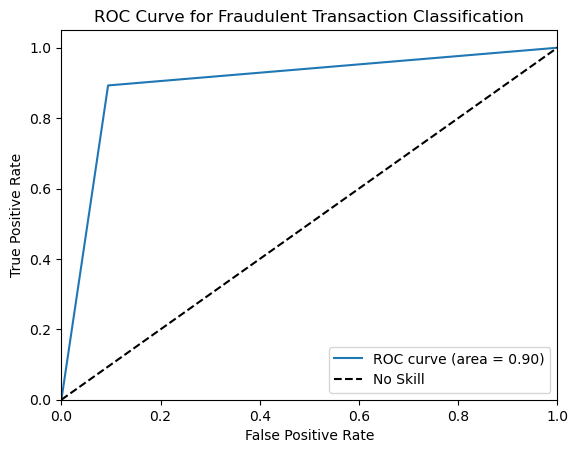

In [151]:
%%time
decision_balanced_model = DecisionTreeClassifier()
train_accuracy, test_accuracy = model_pred_result(train_scaled_us_X,test_scaled_X,train_scaled_us_y,test_y,decision_balanced_model)


Train Accuracy :  1.0
Test Accuracy :  0.9836908816403919
Train Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00       380
           1       1.00      1.00      1.00       380

    accuracy                           1.00       760
   macro avg       1.00      1.00      1.00       760
weighted avg       1.00      1.00      1.00       760

Test Report:                precision    recall  f1-score   support

           0       1.00      0.98      0.99     56850
           1       0.10      0.89      0.18       112

    accuracy                           0.98     56962
   macro avg       0.55      0.94      0.58     56962
weighted avg       1.00      0.98      0.99     56962

Train Confusion. Matrix : 
 [[380   0]
 [  0 380]]
Test Confusion. Matrix  : 
 [[55933   917]
 [   12   100]]
TRAIN ROC AUC SCORE  : 
 1.0
Test ROC AUC SCORE  : 
 0.9383634878753612


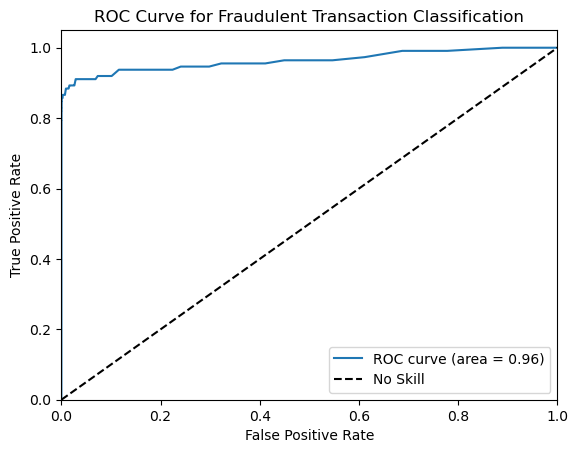

CPU times: user 536 ms, sys: 10.8 ms, total: 547 ms
Wall time: 548 ms


In [152]:
%%time
randmforest_balanced_model = RandomForestClassifier()
train_accuracy, test_accuracy = model_pred_result(train_scaled_us_X,test_scaled_X,train_scaled_us_y,test_y,randmforest_balanced_model)


In [153]:
pd.Series(randmforest_balanced_model.feature_importances_,index=randmforest_balanced_model.feature_names_in_).sort_values(ascending=False)

V10       0.168006
V14       0.149430
V11       0.125466
V12       0.094030
V4        0.064257
V16       0.059353
V17       0.042532
V3        0.036710
V7        0.036431
V2        0.020710
V9        0.016584
Amount    0.016152
V18       0.015687
V1        0.015116
V19       0.014217
V23       0.014149
V21       0.013066
V20       0.012046
V5        0.010827
V6        0.009376
V8        0.008154
V13       0.008095
Time      0.007673
V15       0.007032
V22       0.006874
V27       0.006868
V26       0.005838
V24       0.005808
V28       0.004882
V25       0.004631
dtype: float64

In [154]:
pd.Series(randmforest_balanced_model.feature_importances_,index=randmforest_balanced_model.feature_names_in_).sort_values(ascending=False)[:10]

V10    0.168006
V14    0.149430
V11    0.125466
V12    0.094030
V4     0.064257
V16    0.059353
V17    0.042532
V3     0.036710
V7     0.036431
V2     0.020710
dtype: float64

In [155]:

pd.Series(randmforest_balanced_model.feature_importances_,index=randmforest_balanced_model.feature_names_in_).sort_values(ascending=False)[:10].index

Index(['V10', 'V14', 'V11', 'V12', 'V4', 'V16', 'V17', 'V3', 'V7', 'V2'], dtype='object')

In [156]:
randmforest_balanced_model.feature_names_in_

array(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'Amount'], dtype=object)

In [157]:
RandomForestClassifier()

RandomForestClassifier()

In [158]:
param_grid={
     'n_estimators' : [50, 100, 150, 200, 250, 300],
    'criterion' : ['gini','entropy'],
    'max_depth' : [1,2,3,4,5,6,7,8,9,10],
    'class_weight' : [None, "balanced", "balanced_subsample"]
}

In [159]:
grid = GridSearchCV (estimator=randmforest_balanced_model,param_grid=param_grid,cv=5,verbose=2,scoring='f1')

In [160]:
%%time
grid.fit(train_scaled_us_X,train_scaled_us_y)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
[CV] END class_weight=None, criterion=gini, max_depth=1, n_estimators=50; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=1, n_estimators=50; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=1, n_estimators=50; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=1, n_estimators=50; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=1, n_estimators=50; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=1, n_estimators=100; total time=   0.1s
[CV] END class_weight=None, criterion=gini, max_depth=1, n_estimators=100; total time=   0.1s
[CV] END class_weight=None, criterion=gini, max_depth=1, n_estimators=100; total time=   0.1s
[CV] END class_weight=None, criterion=gini, max_depth=1, n_estimators=100; total time=   0.1s
[CV] END class_weight=None, criterion=gini, max_depth=1, n_estimators=100; total time=   0.1s
[

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': [None, 'balanced',
                                          'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [50, 100, 150, 200, 250, 300]},
             scoring='f1', verbose=2)

In [161]:
grid.best_estimator_

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, n_estimators=50)

In [162]:
grid.best_estimator_

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, n_estimators=50)

In [163]:
grid.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 10,
 'n_estimators': 50}

In [164]:
grid.best_score_

0.9339963693319397

In [165]:
grid.best_estimator_,grid.best_params_,grid.best_score_

(RandomForestClassifier(class_weight='balanced', criterion='entropy',
                        max_depth=10, n_estimators=50),
 {'class_weight': 'balanced',
  'criterion': 'entropy',
  'max_depth': 10,
  'n_estimators': 50},
 0.9339963693319397)

In [166]:
grid.feature_names_in_

array(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'Amount'], dtype=object)

In [167]:
grid.n_features_in_

30

In [168]:
grid = GridSearchCV (estimator=randmforest_balanced_model,param_grid=param_grid,cv=10,verbose=2,scoring='f1')

In [169]:
%%time
grid.fit(train_scaled_us_X,train_scaled_us_y)

Fitting 10 folds for each of 360 candidates, totalling 3600 fits
[CV] END class_weight=None, criterion=gini, max_depth=1, n_estimators=50; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=1, n_estimators=50; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=1, n_estimators=50; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=1, n_estimators=50; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=1, n_estimators=50; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=1, n_estimators=50; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=1, n_estimators=50; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=1, n_estimators=50; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=1, n_estimators=50; total time=   0.0s
[CV] END class_weight=None, criterion=gini, max_depth=1, n_estimators=50; total time=   0.0s
[CV] 

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'class_weight': [None, 'balanced',
                                          'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [50, 100, 150, 200, 250, 300]},
             scoring='f1', verbose=2)

In [170]:
grid.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=7)

In [171]:
grid.best_score_

0.9305917974112073

In [172]:
grid.best_estimator_,grid.best_params_,grid.best_score_

(RandomForestClassifier(class_weight='balanced', max_depth=7),
 {'class_weight': 'balanced',
  'criterion': 'gini',
  'max_depth': 7,
  'n_estimators': 100},
 0.9305917974112073)

In [173]:
model = RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=9, n_estimators=150)

In [174]:
model.fit(train_scaled_us_X,train_scaled_us_y)

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=9, n_estimators=150)

In [175]:
model.feature_importances_

array([0.00714458, 0.01053836, 0.02216482, 0.05223976, 0.07263483,
       0.0097629 , 0.01216169, 0.04995731, 0.01468348, 0.01621794,
       0.10765244, 0.06717847, 0.08254207, 0.01122289, 0.18007746,
       0.00749774, 0.05256517, 0.0939895 , 0.01553658, 0.01592241,
       0.01201708, 0.01209704, 0.00572694, 0.01108778, 0.0054387 ,
       0.0065434 , 0.00798318, 0.0098553 , 0.00734   , 0.02022017])

In [176]:
model.feature_names_in_

array(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'Amount'], dtype=object)

<Axes: >

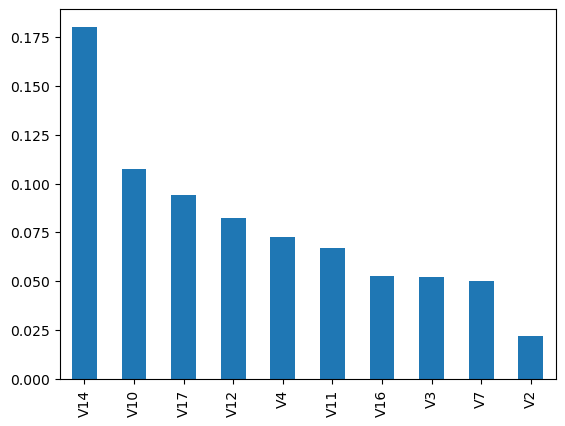

In [177]:
pd.Series(model.feature_importances_,index= model.feature_names_in_).sort_values(ascending=False)[:10].plot(kind = 'bar')

Train Accuracy :  0.9973684210526316
Test Accuracy :  0.9880446613531828
Train Report:                precision    recall  f1-score   support

           0       0.99      1.00      1.00       380
           1       1.00      0.99      1.00       380

    accuracy                           1.00       760
   macro avg       1.00      1.00      1.00       760
weighted avg       1.00      1.00      1.00       760

Test Report:                precision    recall  f1-score   support

           0       1.00      0.99      0.99     56850
           1       0.13      0.88      0.23       112

    accuracy                           0.99     56962
   macro avg       0.56      0.94      0.61     56962
weighted avg       1.00      0.99      0.99     56962

Train Confusion. Matrix : 
 [[380   0]
 [  2 378]]
Test Confusion. Matrix  : 
 [[56182   668]
 [   13    99]]
TRAIN ROC AUC SCORE  : 
 0.9973684210526316
Test ROC AUC SCORE  : 
 0.9360891757758512


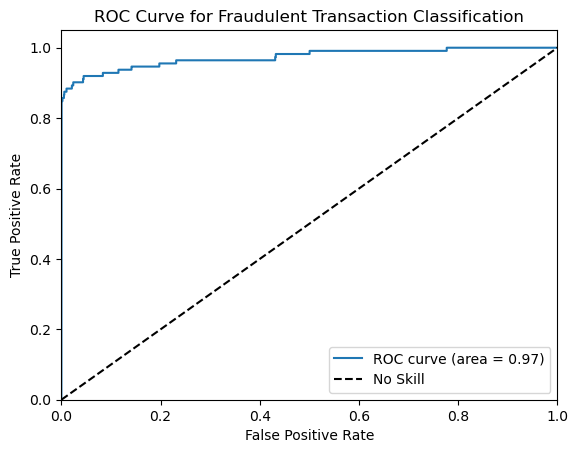

In [178]:
%%time
train_accuracy, test_accuracy = model_pred_result(train_scaled_us_X, test_scaled_X, train_scaled_us_y, test_y, model)

In [179]:
top_feature = pd.Series(model.feature_importances_,index= model.feature_names_in_).sort_values(ascending=False)[:10].index

In [180]:
top_feature

Index(['V14', 'V12', 'V17', 'V10', 'V4', 'V16', 'V11', 'V3', 'V7', 'Amount'], dtype='object')

Train Accuracy :  0.9960526315789474
Test Accuracy :  0.9841824374144166
Train Report:                precision    recall  f1-score   support

           0       0.99      1.00      1.00       380
           1       1.00      0.99      1.00       380

    accuracy                           1.00       760
   macro avg       1.00      1.00      1.00       760
weighted avg       1.00      1.00      1.00       760

Test Report:                precision    recall  f1-score   support

           0       1.00      0.98      0.99     56850
           1       0.10      0.88      0.18       112

    accuracy                           0.98     56962
   macro avg       0.55      0.93      0.59     56962
weighted avg       1.00      0.98      0.99     56962

Train Confusion. Matrix : 
 [[380   0]
 [  3 377]]
Test Confusion. Matrix  : 
 [[55963   887]
 [   14    98]]
TRAIN ROC AUC SCORE  : 
 0.9960526315789473
Test ROC AUC SCORE  : 
 0.9296987686895339


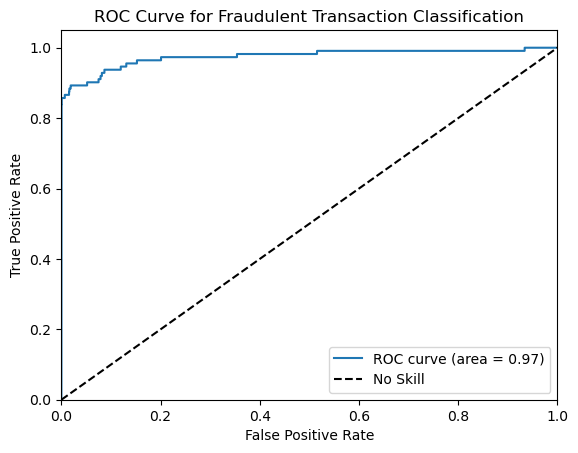

In [181]:
%%time
train_accuracy, test_accuracy = model_pred_result(train_scaled_us_X[top_feature], test_scaled_X[top_feature], train_scaled_us_y, test_y, model)

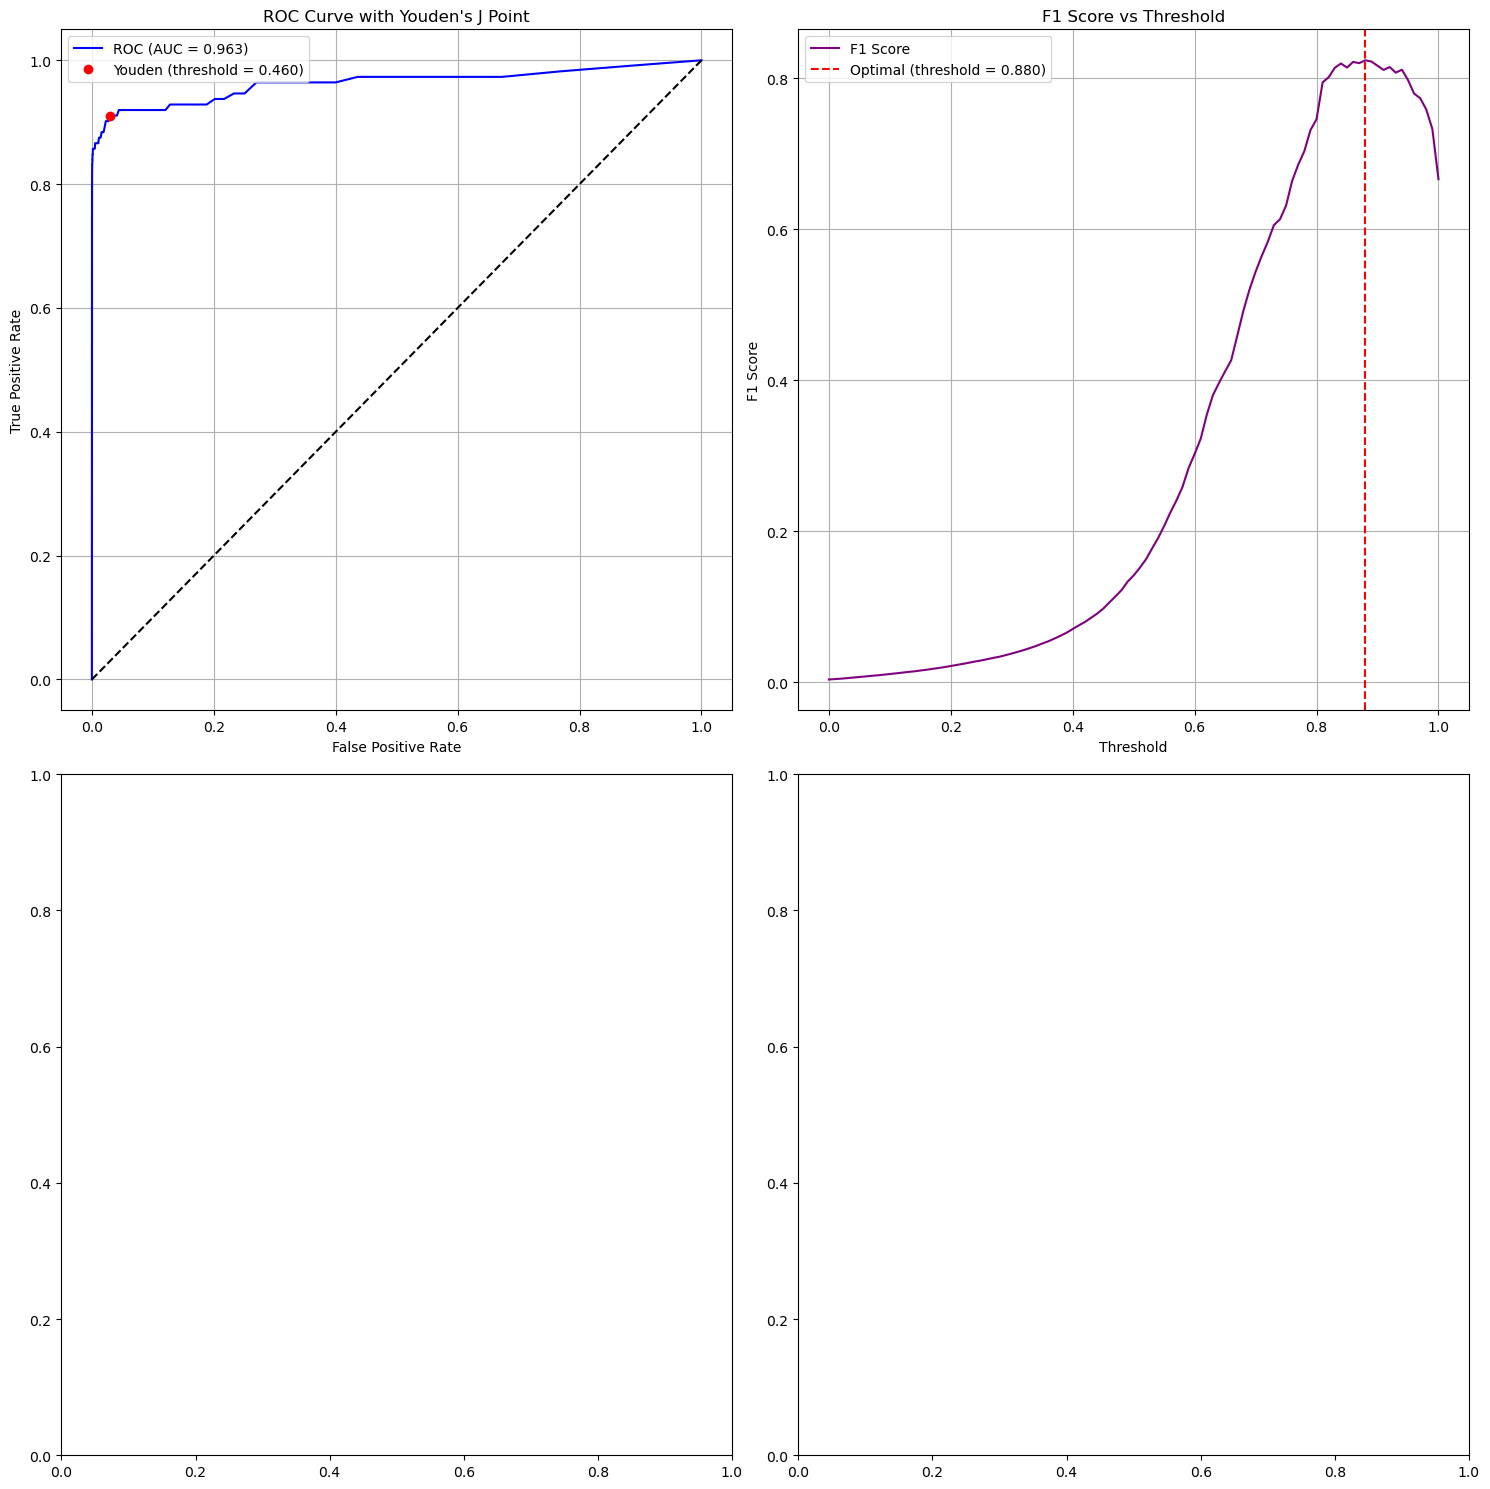


Optimal Thresholds:

Youden Method:
threshold: 0.460
tpr: 0.911
fpr: 0.030

Performance metrics:
accuracy: 0.970
precision: 0.056
recall: 0.911
f1_score: 0.106

F1 Method:
threshold: 0.880
precision: 0.856
recall: 0.795

Performance metrics:
accuracy: 0.999
precision: 0.856
recall: 0.795
f1_score: 0.824


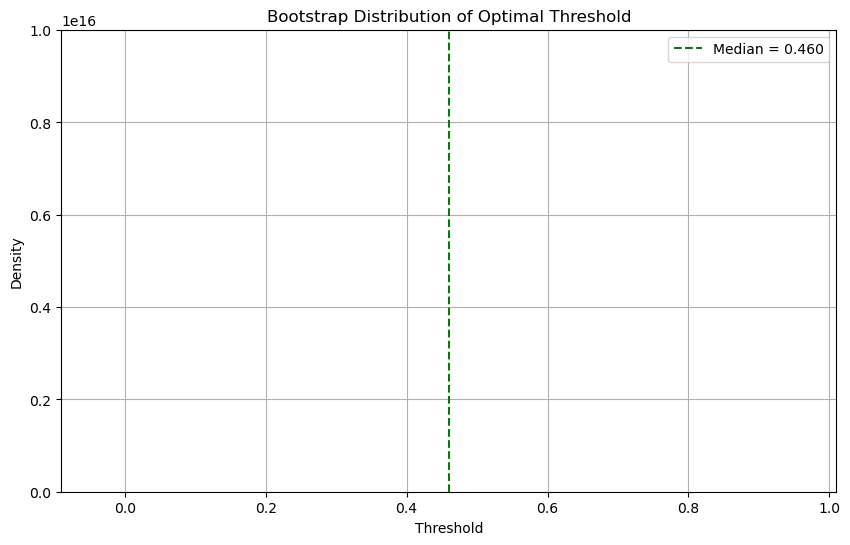


Bootstrap Analysis:
median: 0.460
mean: 0.460
std: 0.000
95% CI: [0.460, 0.460]


In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, f1_score, accuracy_score
from scipy.stats import gaussian_kde

def find_optimal_threshold(y_true, y_pred_proba, plot=True):
    """
    Find optimal threshold using multiple methods
    """
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    
    # Method 1: Youden's J statistic (max(tpr - fpr))
    J = tpr - fpr
    optimal_idx_youden = np.argmax(J)
    optimal_threshold_youden = thresholds[optimal_idx_youden]
    
#     # Method 2: Geometric mean of TPR and TNR
#     geometric_mean = np.sqrt(tpr * (1-fpr))
#     optimal_idx_geometric = np.argmax(geometric_mean)
#     optimal_threshold_geometric = thresholds[optimal_idx_geometric]
    
#     # Method 3: Closest point to (0,1)
#     distances = np.sqrt(fpr**2 + (1-tpr)**2)
#     optimal_idx_distance = np.argmin(distances)
#     optimal_threshold_distance = thresholds[optimal_idx_distance]
    
    # Method 4: F1 Score
    precision, recall, thresholds_pr = precision_recall_curve(y_true, y_pred_proba)
    f1_scores = 2 * (precision * recall) / (precision + recall)
    optimal_idx_f1 = np.argmax(f1_scores[:-1])  # Exclude last point
    optimal_threshold_f1 = thresholds_pr[optimal_idx_f1]
    
    if plot:
        # Create figure with subplots
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15))
        
        # Plot 1: ROC curve with Youden's J
        ax1.plot(fpr, tpr, 'b-', label=f'ROC (AUC = {auc(fpr, tpr):.3f})')
        ax1.plot([0, 1], [0, 1], 'k--')
        ax1.plot(fpr[optimal_idx_youden], tpr[optimal_idx_youden], 'ro', 
                label=f'Youden (threshold = {optimal_threshold_youden:.3f})')
        ax1.set_xlabel('False Positive Rate')
        ax1.set_ylabel('True Positive Rate')
        ax1.set_title("ROC Curve with Youden's J Point")
        ax1.legend()
        ax1.grid(True)
        
#         # Plot 2: Geometric Mean
#         ax2.plot(thresholds, geometric_mean[:-1], 'g-', label='Geometric Mean')
#         ax2.axvline(optimal_threshold_geometric, color='r', linestyle='--',
#                    label=f'Optimal (threshold = {optimal_threshold_geometric:.3f})')
#         ax2.set_xlabel('Threshold')
#         ax2.set_ylabel('Geometric Mean of TPR & TNR')
#         ax2.set_title('Geometric Mean vs Threshold')
#         ax2.legend()
#         ax2.grid(True)
        
#         # Plot 3: Distance to (0,1)
#         ax3.plot(thresholds, distances[:-1], 'b-', label='Distance to (0,1)')
#         ax3.axvline(optimal_threshold_distance, color='r', linestyle='--',
#                    label=f'Optimal (threshold = {optimal_threshold_distance:.3f})')
#         ax3.set_xlabel('Threshold')
#         ax3.set_ylabel('Distance to (0,1)')
#         ax3.set_title('Distance to (0,1) vs Threshold')
#         ax3.legend()
#         ax3.grid(True)
        
        # Plot 4: F1 Score
        ax2.plot(thresholds_pr, f1_scores[:-1], 'purple', label='F1 Score')
        ax2.axvline(optimal_threshold_f1, color='r', linestyle='--',
                   label=f'Optimal (threshold = {optimal_threshold_f1:.3f})')
        ax2.set_xlabel('Threshold')
        ax2.set_ylabel('F1 Score')
        ax2.set_title('F1 Score vs Threshold')
        ax2.legend()
        ax2.grid(True)
        
        plt.tight_layout()
        plt.show()
    
    # Create results dictionary
    results = {
        'youden': {
            'threshold': optimal_threshold_youden,
            'tpr': tpr[optimal_idx_youden],
            'fpr': fpr[optimal_idx_youden]
        },
#         'geometric': {
#             'threshold': optimal_threshold_geometric,
#             'tpr': tpr[optimal_idx_geometric],
#             'fpr': fpr[optimal_idx_geometric]
#         },
#         'distance': {
#             'threshold': optimal_threshold_distance,
#             'tpr': tpr[optimal_idx_distance],
#             'fpr': fpr[optimal_idx_distance]
#         },
        'f1': {
            'threshold': optimal_threshold_f1,
            'precision': precision[optimal_idx_f1],
            'recall': recall[optimal_idx_f1]
        }
    }
    
    return results

def evaluate_threshold_performance(y_true, y_pred_proba, threshold):
    """
    Evaluate model performance at specific threshold
    """
    y_pred = (y_pred_proba >= threshold).astype(int)
    
    # Calculate metrics
    TP = np.sum((y_pred == 1) & (y_true == 1))
    TN = np.sum((y_pred == 0) & (y_true == 0))
    FP = np.sum((y_pred == 1) & (y_true == 0))
    FN = np.sum((y_pred == 0) & (y_true == 1))
    
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': {
            'TP': TP, 'TN': TN,
            'FP': FP, 'FN': FN
        }
    }

def find_threshold_distribution(y_true, y_pred_proba, n_bootstraps=1000):
    """
    Find threshold distribution using bootstrap sampling
    """
    thresholds = []
    n_samples = len(y_true)
    
    for _ in range(n_bootstraps):
        # Bootstrap sampling
        sample_true = y_true
        sample_pred = y_pred_proba
        
        # Find optimal threshold using Youden's J
        fpr, tpr, thresh = roc_curve(sample_true, sample_pred)
        optimal_idx = np.argmax(tpr - fpr)
        thresholds.append(thresh[optimal_idx])
    
    # Plot threshold distribution
    plt.figure(figsize=(10, 6))
    plt.hist(thresholds, bins=50, density=True, alpha=0.7)
    
    # Add density curve
    density = gaussian_kde(thresholds)
    xs = np.linspace(min(thresholds), max(thresholds), 200)
    plt.plot(xs, density(xs), 'r-', lw=2)
    
    plt.axvline(np.median(thresholds), color='g', linestyle='--',
                label=f'Median = {np.median(thresholds):.3f}')
    plt.xlabel('Threshold')
    plt.ylabel('Density')
    plt.title('Bootstrap Distribution of Optimal Threshold')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return {
        'median': np.median(thresholds),
        'mean': np.mean(thresholds),
        'std': np.std(thresholds),
        '95_ci': np.percentile(thresholds, [2.5, 97.5])
    }

# Example usage
def main():
    # Generate sample data
    from sklearn.datasets import make_classification
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestClassifier
    
    
    # Train model
    model = RandomForestClassifier(random_state=42)
    model.fit(train_scaled_us_X, train_scaled_us_y)
    
    # Get predictions
    y_pred_proba = model.predict_proba(test_scaled_X)[:, 1]
    
    # Find optimal thresholds
    results = find_optimal_threshold(test_y, y_pred_proba)
    
    # Print results
    print("\nOptimal Thresholds:")
    for method, vals in results.items():
        print(f"\n{method.capitalize()} Method:")
        for metric, value in vals.items():
            print(f"{metric}: {value:.3f}")
        
        # Evaluate performance at this threshold
        if 'threshold' in vals:
            performance = evaluate_threshold_performance(test_y, y_pred_proba, vals['threshold'])
            print("\nPerformance metrics:")
            for metric, value in performance.items():
                if metric != 'confusion_matrix':
                    print(f"{metric}: {value:.3f}")
    
    # Find threshold distribution
    bootstrap_results = find_threshold_distribution(test_y, y_pred_proba)
    print("\nBootstrap Analysis:")
    for metric, value in bootstrap_results.items():
        if metric == '95_ci':
            print(f"95% CI: [{value[0]:.3f}, {value[1]:.3f}]")
        else:
            print(f"{metric}: {value:.3f}")
main()

In [183]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier,StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import
from sklearn.svm import SVC

In [184]:
model = AdaBoostClassifier(n_estimators=200)

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Train Accuracy :  1.0
Test Accuracy :  0.9624662055405357
Train Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00       380
           1       1.00      1.00      1.00       380

    accuracy                           1.00       760
   macro avg       1.00      1.00      1.00       760
weighted avg       1.00      1.00      1.00       760

Test Report:                precision    recall  f1-score   support

           0       1.00      0.96      0.98     56850
           1       0.05      0.90      0.09       112

    accuracy                           0.96     56962
   macro avg       0.52      0.93      0.53     56962
weighted avg       1.00      0.96      0.98     56962

Train Confusion. Matrix : 
 [[380   0]
 [  0 380]]
Test Confusion. Matrix  : 
 [[54723  2127]
 [   11   101]]
TRAIN ROC AUC SCORE  : 
 1.0
Test ROC AUC SCORE  : 
 0.9321857331323031


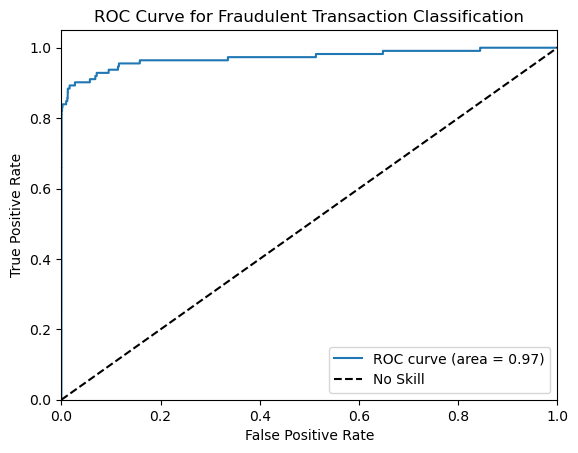

In [185]:
%%time
train_accuracy, test_accuracy = model_pred_result(train_scaled_us_X[top_feature], test_scaled_X[top_feature], train_scaled_us_y, test_y, model)

In [186]:
model = GradientBoostingClassifier(n_estimators=500)

Train Accuracy :  1.0
Test Accuracy :  0.9695937642638952
Train Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00       380
           1       1.00      1.00      1.00       380

    accuracy                           1.00       760
   macro avg       1.00      1.00      1.00       760
weighted avg       1.00      1.00      1.00       760

Test Report:                precision    recall  f1-score   support

           0       1.00      0.97      0.98     56850
           1       0.05      0.88      0.10       112

    accuracy                           0.97     56962
   macro avg       0.53      0.93      0.54     56962
weighted avg       1.00      0.97      0.98     56962

Train Confusion. Matrix : 
 [[380   0]
 [  0 380]]
Test Confusion. Matrix  : 
 [[55131  1719]
 [   13    99]]
TRAIN ROC AUC SCORE  : 
 1.0
Test ROC AUC SCORE  : 
 0.9268455522050509


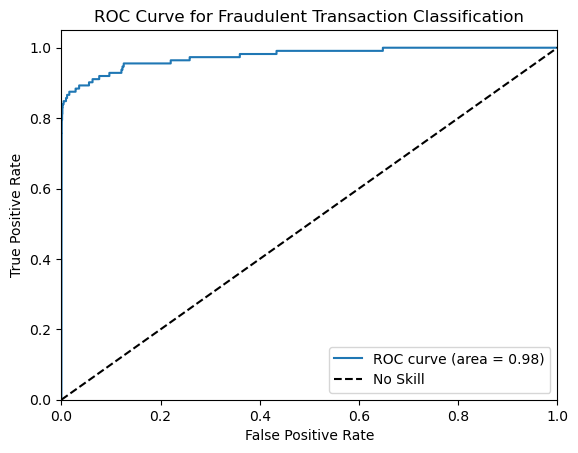

In [187]:
%%time
train_accuracy, test_accuracy = model_pred_result(train_scaled_us_X[top_feature], test_scaled_X[top_feature], train_scaled_us_y, test_y, model)

In [188]:
import xgboost as xgb

In [189]:
!which python
!python --version

/opt/anaconda3/envs/myenv/bin/python
Python 3.12.7


In [190]:
!pip show xgboost

Name: xgboost
Version: 2.1.2
Summary: XGBoost Python Package
Home-page: 
Author: 
Author-email: Hyunsu Cho <chohyu01@cs.washington.edu>, Jiaming Yuan <jm.yuan@outlook.com>
License: Apache-2.0
Location: /opt/anaconda3/envs/myenv/lib/python3.12/site-packages
Requires: numpy, scipy
Required-by: 


In [191]:
import sys

In [192]:
sys.path.append("/opt/anaconda3/envs/myenv/lib/python3.12/site-packages")

In [278]:
import xgboost as xgb

In [282]:
import warnings
warnings.filterwarnings('ignore')

In [194]:
model =  xgb.XGBClassifier(eval_metric='auc')

Train Accuracy :  1.0
Test Accuracy :  0.9743513219339208
Train Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00       380
           1       1.00      1.00      1.00       380

    accuracy                           1.00       760
   macro avg       1.00      1.00      1.00       760
weighted avg       1.00      1.00      1.00       760

Test Report:                precision    recall  f1-score   support

           0       1.00      0.97      0.99     56850
           1       0.07      0.91      0.12       112

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.97      0.99     56962

Train Confusion. Matrix : 
 [[380   0]
 [  0 380]]
Test Confusion. Matrix  : 
 [[55399  1451]
 [   10   102]]
TRAIN ROC AUC SCORE  : 
 1.0
Test ROC AUC SCORE  : 
 0.9425954893830882


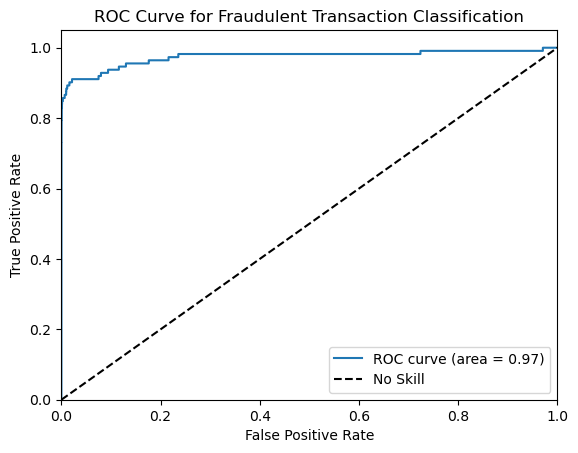

In [195]:
%%time
train_accuracy, test_accuracy = model_pred_result(train_scaled_us_X, test_scaled_X, train_scaled_us_y, test_y, model)

## Voting

In [260]:
clf1 = RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=9, n_estimators=150)

clf2 = GradientBoostingClassifier() 
clf3 = xgb.XGBClassifier(eval_metric='auc')

voting_model = VotingClassifier(estimators=[('rf', clf1), ('gbm', clf2), ('xgb', clf3)], voting='soft')

Train Accuracy :  1.0
Test Accuracy :  0.9804957691092308
Train Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00       380
           1       1.00      1.00      1.00       380

    accuracy                           1.00       760
   macro avg       1.00      1.00      1.00       760
weighted avg       1.00      1.00      1.00       760

Test Report:                precision    recall  f1-score   support

           0       1.00      0.98      0.99     56850
           1       0.08      0.89      0.15       112

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.57     56962
weighted avg       1.00      0.98      0.99     56962

Train Confusion. Matrix : 
 [[380   0]
 [  0 380]]
Test Confusion. Matrix  : 
 [[55751  1099]
 [   12   100]]
TRAIN ROC AUC SCORE  : 
 1.0
Test ROC AUC SCORE  : 
 0.9367627842693805


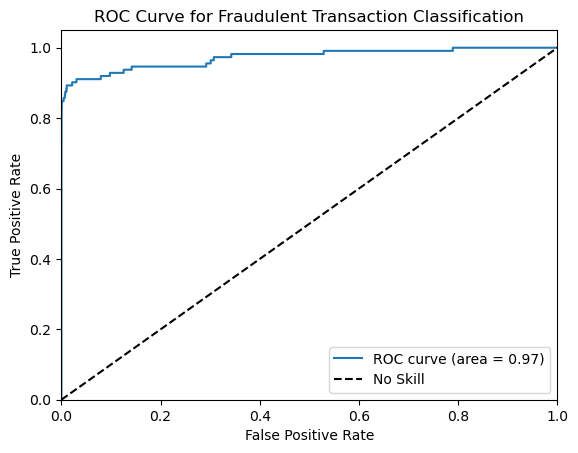

CPU times: user 2.04 s, sys: 247 ms, total: 2.29 s
Wall time: 2.11 s


In [290]:
%%time
train_accuracy, test_accuracy = model_pred_result(train_scaled_us_X, test_scaled_X, train_scaled_us_y, test_y, voting_model)

Train Accuracy :  1.0
Test Accuracy :  0.9727888767950563
Train Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00       380
           1       1.00      1.00      1.00       380

    accuracy                           1.00       760
   macro avg       1.00      1.00      1.00       760
weighted avg       1.00      1.00      1.00       760

Test Report:                precision    recall  f1-score   support

           0       1.00      0.97      0.99     56850
           1       0.06      0.89      0.11       112

    accuracy                           0.97     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.97      0.98     56962

Train Confusion. Matrix : 
 [[380   0]
 [  0 380]]
Test Confusion. Matrix  : 
 [[55312  1538]
 [   12   100]]
TRAIN ROC AUC SCORE  : 
 1.0
Test ROC AUC SCORE  : 
 0.932901746450559


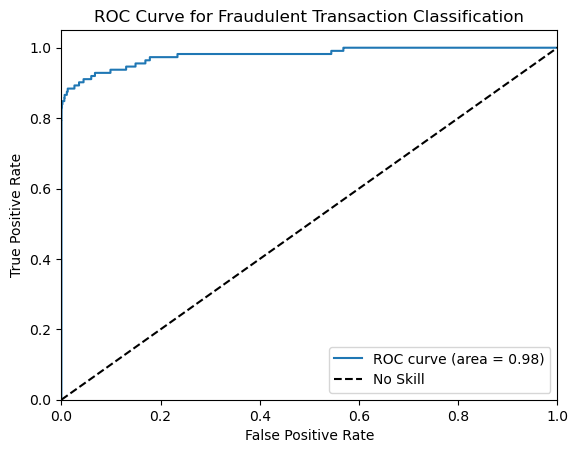

CPU times: user 1.5 s, sys: 195 ms, total: 1.69 s
Wall time: 1.49 s


In [292]:
%%time
train_accuracy, test_accuracy = model_pred_result(train_scaled_us_X[top_feature], test_scaled_X[top_feature], train_scaled_us_y, test_y, voting_model)

In [294]:
clf1 = RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=9, n_estimators=150)

clf2 = GradientBoostingClassifier() 
clf3 = xgb.XGBClassifier(eval_metric='auc')
clf4 = AdaBoostClassifier()
voting_model = VotingClassifier(estimators=[('rf', clf1), ('gbm', clf2), ('lr', clf3), ('ada', clf4)], voting='soft')
# voting_model = VotingClassifier(estimators=[('rf', clf1), ('gbm', clf2), ('lr', clf3)], voting='soft')

Train Accuracy :  1.0
Test Accuracy :  0.9804079912924406
Train Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00       380
           1       1.00      1.00      1.00       380

    accuracy                           1.00       760
   macro avg       1.00      1.00      1.00       760
weighted avg       1.00      1.00      1.00       760

Test Report:                precision    recall  f1-score   support

           0       1.00      0.98      0.99     56850
           1       0.08      0.89      0.15       112

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.57     56962
weighted avg       1.00      0.98      0.99     56962

Train Confusion. Matrix : 
 [[380   0]
 [  0 380]]
Test Confusion. Matrix  : 
 [[55746  1104]
 [   12   100]]
TRAIN ROC AUC SCORE  : 
 1.0
Test ROC AUC SCORE  : 
 0.9367188088955899


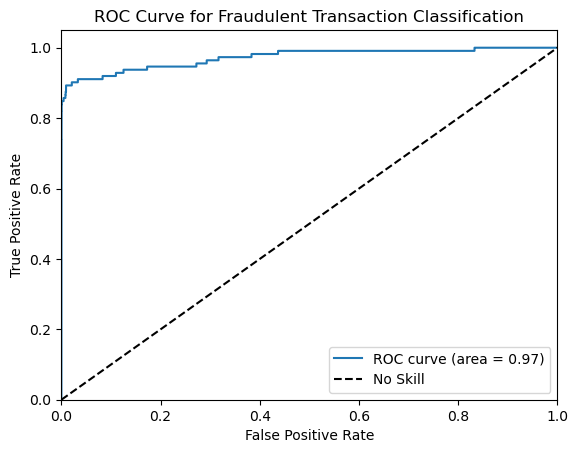

CPU times: user 2.03 s, sys: 237 ms, total: 2.27 s
Wall time: 2.1 s


In [296]:
%%time
train_accuracy, test_accuracy = model_pred_result(train_scaled_us_X, test_scaled_X, train_scaled_us_y, test_y, voting_model)

Train Accuracy :  1.0
Test Accuracy :  0.9731575436255749
Train Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00       380
           1       1.00      1.00      1.00       380

    accuracy                           1.00       760
   macro avg       1.00      1.00      1.00       760
weighted avg       1.00      1.00      1.00       760

Test Report:                precision    recall  f1-score   support

           0       1.00      0.97      0.99     56850
           1       0.06      0.88      0.11       112

    accuracy                           0.97     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.97      0.98     56962

Train Confusion. Matrix : 
 [[380   0]
 [  0 380]]
Test Confusion. Matrix  : 
 [[55334  1516]
 [   13    99]]
TRAIN ROC AUC SCORE  : 
 1.0
Test ROC AUC SCORE  : 
 0.9286309523809524


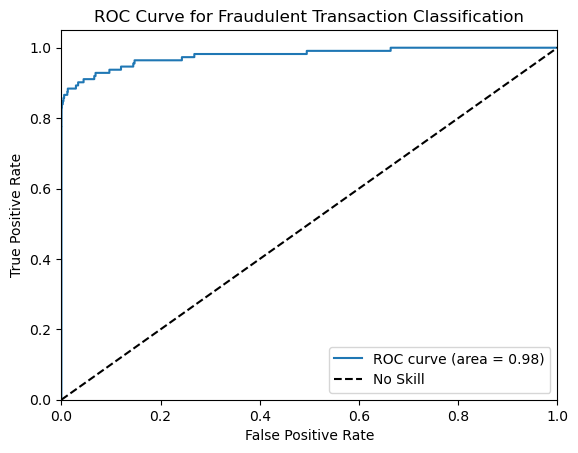

CPU times: user 1.5 s, sys: 170 ms, total: 1.67 s
Wall time: 1.46 s


In [298]:
%%time
train_accuracy, test_accuracy = model_pred_result(train_scaled_us_X[top_feature], test_scaled_X[top_feature], train_scaled_us_y, test_y, voting_model)

In [300]:
clf1 = RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=9, n_estimators=150)

clf2 = GradientBoostingClassifier() 
clf3 = xgb.XGBClassifier(eval_metric='auc')
clf4 = AdaBoostClassifier()

voting_model = VotingClassifier(estimators=[('rf', clf1), ('gbm', clf2), ('lr', clf3), ('ada', clf4)], voting='hard')

In [302]:
%%time
train_accuracy, test_accuracy = model_pred_result(train_scaled_us_X[top_feature], test_scaled_X[top_feature], train_scaled_us_y, test_y, voting_model)

Train Accuracy :  0.993421052631579
Test Accuracy :  0.9796355465046873
Train Report:                precision    recall  f1-score   support

           0       0.99      1.00      0.99       380
           1       1.00      0.99      0.99       380

    accuracy                           0.99       760
   macro avg       0.99      0.99      0.99       760
weighted avg       0.99      0.99      0.99       760

Test Report:                precision    recall  f1-score   support

           0       1.00      0.98      0.99     56850
           1       0.08      0.88      0.15       112

    accuracy                           0.98     56962
   macro avg       0.54      0.93      0.57     56962
weighted avg       1.00      0.98      0.99     56962

Train Confusion. Matrix : 
 [[380   0]
 [  5 375]]
Test Confusion. Matrix  : 
 [[55703  1147]
 [   13    99]]
TRAIN ROC AUC SCORE  : 
 0.993421052631579
Test ROC AUC SCORE  : 
 0.9318763349667043


AttributeError: This 'VotingClassifier' has no attribute 'predict_proba'

## Stacking

In [304]:
estimators = [
    ('rf1',RandomForestClassifier(n_estimators=10, random_state=42)),
    ('rf2',RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=9, n_estimators=150)),
    ('gbm',GradientBoostingClassifier()),
    ('ada', AdaBoostClassifier(n_estimators=200))
]


In [305]:
clf = StackingClassifier(estimators=estimators,final_estimator=LogisticRegression())

Train Accuracy :  1.0
Test Accuracy :  0.9765984340437485
Train Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00       380
           1       1.00      1.00      1.00       380

    accuracy                           1.00       760
   macro avg       1.00      1.00      1.00       760
weighted avg       1.00      1.00      1.00       760

Test Report:                precision    recall  f1-score   support

           0       1.00      0.98      0.99     56850
           1       0.07      0.91      0.13       112

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.56     56962
weighted avg       1.00      0.98      0.99     56962

Train Confusion. Matrix : 
 [[380   0]
 [  0 380]]
Test Confusion. Matrix  : 
 [[55527  1323]
 [   10   102]]
TRAIN ROC AUC SCORE  : 
 1.0
Test ROC AUC SCORE  : 
 0.9437212589521295


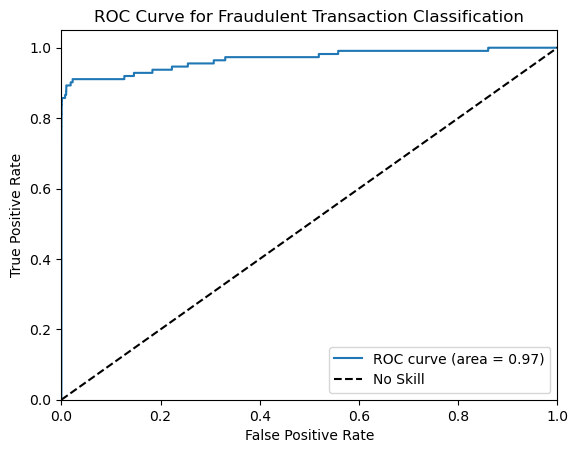

CPU times: user 8.09 s, sys: 489 ms, total: 8.58 s
Wall time: 8.88 s


In [306]:
%%time
train_accuracy, test_accuracy = model_pred_result(train_scaled_us_X, test_scaled_X, train_scaled_us_y, test_y, clf)

Train Accuracy :  1.0
Test Accuracy :  0.9730346546820687
Train Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00       380
           1       1.00      1.00      1.00       380

    accuracy                           1.00       760
   macro avg       1.00      1.00      1.00       760
weighted avg       1.00      1.00      1.00       760

Test Report:                precision    recall  f1-score   support

           0       1.00      0.97      0.99     56850
           1       0.06      0.88      0.11       112

    accuracy                           0.97     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.97      0.98     56962

Train Confusion. Matrix : 
 [[380   0]
 [  0 380]]
Test Confusion. Matrix  : 
 [[55327  1523]
 [   13    99]]
TRAIN ROC AUC SCORE  : 
 1.0
Test ROC AUC SCORE  : 
 0.9285693868576453


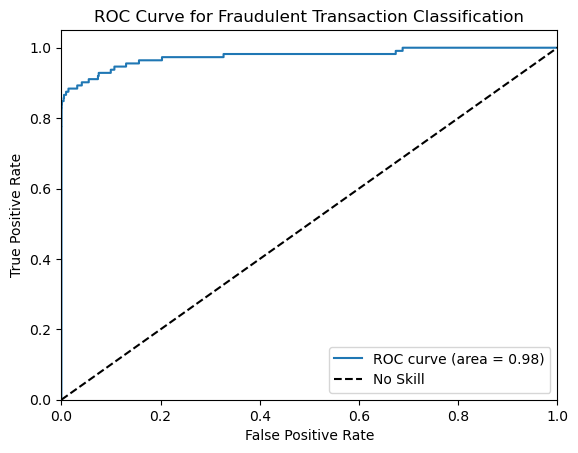

CPU times: user 4.65 s, sys: 241 ms, total: 4.89 s
Wall time: 5.03 s


In [307]:
%%time
train_accuracy, test_accuracy = model_pred_result(train_scaled_us_X[top_feature], test_scaled_X[top_feature], train_scaled_us_y, test_y, clf)

In [308]:
estimators = [
    ('rf1',RandomForestClassifier(n_estimators=10, random_state=42)),
    ('rf2',RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=9, n_estimators=150)),
    ('gbm',GradientBoostingClassifier()),
    ('ada', AdaBoostClassifier(n_estimators=200)),
    ('voting',voting_model )
]


In [309]:
clf = StackingClassifier(estimators=estimators,final_estimator=LogisticRegression())

Train Accuracy :  1.0
Test Accuracy :  0.9746497665110073
Train Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00       380
           1       1.00      1.00      1.00       380

    accuracy                           1.00       760
   macro avg       1.00      1.00      1.00       760
weighted avg       1.00      1.00      1.00       760

Test Report:                precision    recall  f1-score   support

           0       1.00      0.97      0.99     56850
           1       0.07      0.91      0.12       112

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.56     56962
weighted avg       1.00      0.97      0.99     56962

Train Confusion. Matrix : 
 [[380   0]
 [  0 380]]
Test Confusion. Matrix  : 
 [[55416  1434]
 [   10   102]]
TRAIN ROC AUC SCORE  : 
 1.0
Test ROC AUC SCORE  : 
 0.9427450056539766


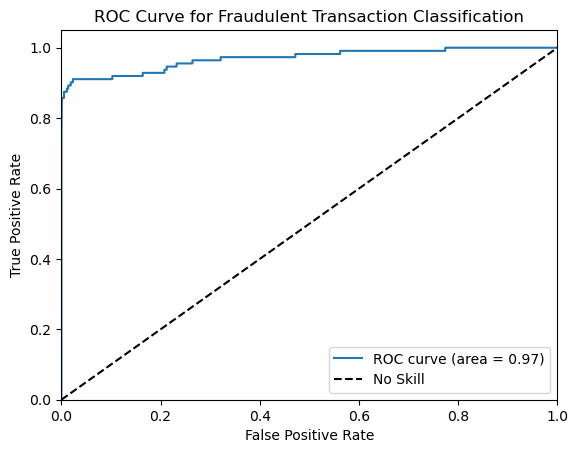

CPU times: user 14 s, sys: 1.22 s, total: 15.2 s
Wall time: 14.7 s


In [310]:
%%time
train_accuracy, test_accuracy = model_pred_result(train_scaled_us_X, test_scaled_X, train_scaled_us_y, test_y, clf)

Train Accuracy :  1.0
Test Accuracy :  0.9743337663705628
Train Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00       380
           1       1.00      1.00      1.00       380

    accuracy                           1.00       760
   macro avg       1.00      1.00      1.00       760
weighted avg       1.00      1.00      1.00       760

Test Report:                precision    recall  f1-score   support

           0       1.00      0.97      0.99     56850
           1       0.06      0.88      0.12       112

    accuracy                           0.97     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.97      0.99     56962

Train Confusion. Matrix : 
 [[380   0]
 [  0 380]]
Test Confusion. Matrix  : 
 [[55401  1449]
 [   13    99]]
TRAIN ROC AUC SCORE  : 
 1.0
Test ROC AUC SCORE  : 
 0.9292202223897474


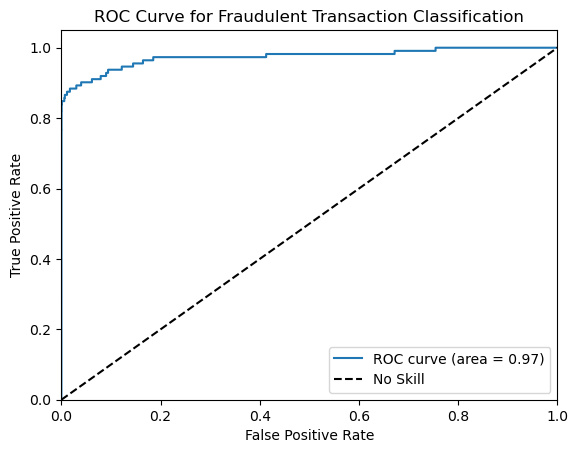

CPU times: user 8.2 s, sys: 937 ms, total: 9.14 s
Wall time: 8.71 s


In [311]:
%%time
train_accuracy, test_accuracy = model_pred_result(train_scaled_us_X[top_feature], test_scaled_X[top_feature], train_scaled_us_y, test_y, clf)

In [312]:
estimators = [
    ('rf1',RandomForestClassifier(n_estimators=10, random_state=42)),
    ('rf2',RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=9, n_estimators=150)),
    ('gbm',GradientBoostingClassifier()),
    ('ada', AdaBoostClassifier(n_estimators=200)),
    ('voting',voting_model )
]


In [313]:
clf = StackingClassifier(estimators=estimators,final_estimator=xgb.XGBClassifier(eval_metric='auc'))

Train Accuracy :  0.9671052631578947
Test Accuracy :  0.9480179768968786
Train Report:                precision    recall  f1-score   support

           0       0.94      0.99      0.97       380
           1       0.99      0.94      0.97       380

    accuracy                           0.97       760
   macro avg       0.97      0.97      0.97       760
weighted avg       0.97      0.97      0.97       760

Test Report:                precision    recall  f1-score   support

           0       1.00      0.95      0.97     56850
           1       0.03      0.87      0.06       112

    accuracy                           0.95     56962
   macro avg       0.52      0.91      0.52     56962
weighted avg       1.00      0.95      0.97     56962

Train Confusion. Matrix : 
 [[377   3]
 [ 22 358]]
Test Confusion. Matrix  : 
 [[53904  2946]
 [   15    97]]
TRAIN ROC AUC SCORE  : 
 0.9671052631578948
Test ROC AUC SCORE  : 
 0.9071254240482473


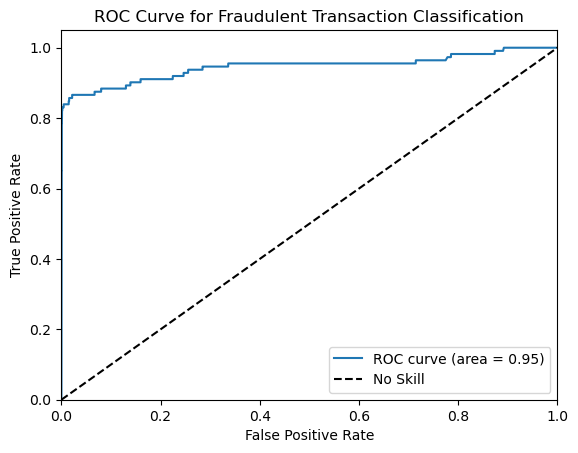

CPU times: user 14.1 s, sys: 1.24 s, total: 15.4 s
Wall time: 14.5 s


In [314]:
%%time
train_accuracy, test_accuracy = model_pred_result(train_scaled_us_X, test_scaled_X, train_scaled_us_y, test_y, clf)

Train Accuracy :  0.9723684210526315
Test Accuracy :  0.9578842035040904
Train Report:                precision    recall  f1-score   support

           0       0.96      0.98      0.97       380
           1       0.98      0.96      0.97       380

    accuracy                           0.97       760
   macro avg       0.97      0.97      0.97       760
weighted avg       0.97      0.97      0.97       760

Test Report:                precision    recall  f1-score   support

           0       1.00      0.96      0.98     56850
           1       0.04      0.87      0.07       112

    accuracy                           0.96     56962
   macro avg       0.52      0.91      0.53     56962
weighted avg       1.00      0.96      0.98     56962

Train Confusion. Matrix : 
 [[374   6]
 [ 15 365]]
Test Confusion. Matrix  : 
 [[54466  2384]
 [   15    97]]
TRAIN ROC AUC SCORE  : 
 0.9723684210526315
Test ROC AUC SCORE  : 
 0.9120682560623194


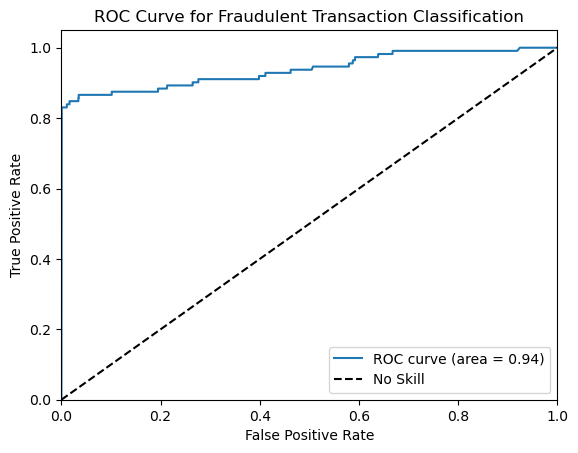

CPU times: user 8.41 s, sys: 999 ms, total: 9.41 s
Wall time: 8.7 s


In [315]:
%%time
train_accuracy, test_accuracy = model_pred_result(train_scaled_us_X[top_feature], test_scaled_X[top_feature], train_scaled_us_y, test_y, clf)

## Practice

### oversampling - scaled data

In [318]:
over_sampling = RandomOverSampler()

In [319]:
over_sampling

RandomOverSampler()

In [320]:
train_y.value_counts()

Class
0    227465
1       380
Name: count, dtype: int64

In [321]:
%%time
train_scaled_oversample_X, train_y_oversample =  over_sampling.fit_resample(train_scaled_X, train_y)

CPU times: user 41.7 ms, sys: 64.9 ms, total: 107 ms
Wall time: 139 ms


In [322]:
train_y.value_counts()

Class
0    227465
1       380
Name: count, dtype: int64

In [323]:
train_y_oversample.value_counts()

Class
0    227465
1    227465
Name: count, dtype: int64

In [324]:
train_scaled_oversample_X.shape

(454930, 30)

In [325]:
train_data_scaled_oversample = pd.concat([train_scaled_oversample_X,train_y_oversample], axis = 1)

In [326]:
train_data_scaled_oversample.shape

(454930, 31)

In [327]:
train_data_scaled_oversample['Class'].value_counts()

Class
0    227465
1    227465
Name: count, dtype: int64

<Axes: xlabel='Class'>

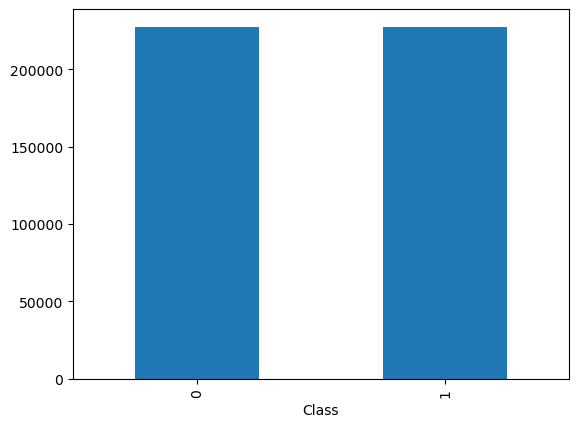

In [328]:
train_data_scaled_oversample['Class'].value_counts().plot(kind = 'bar')

<Axes: >

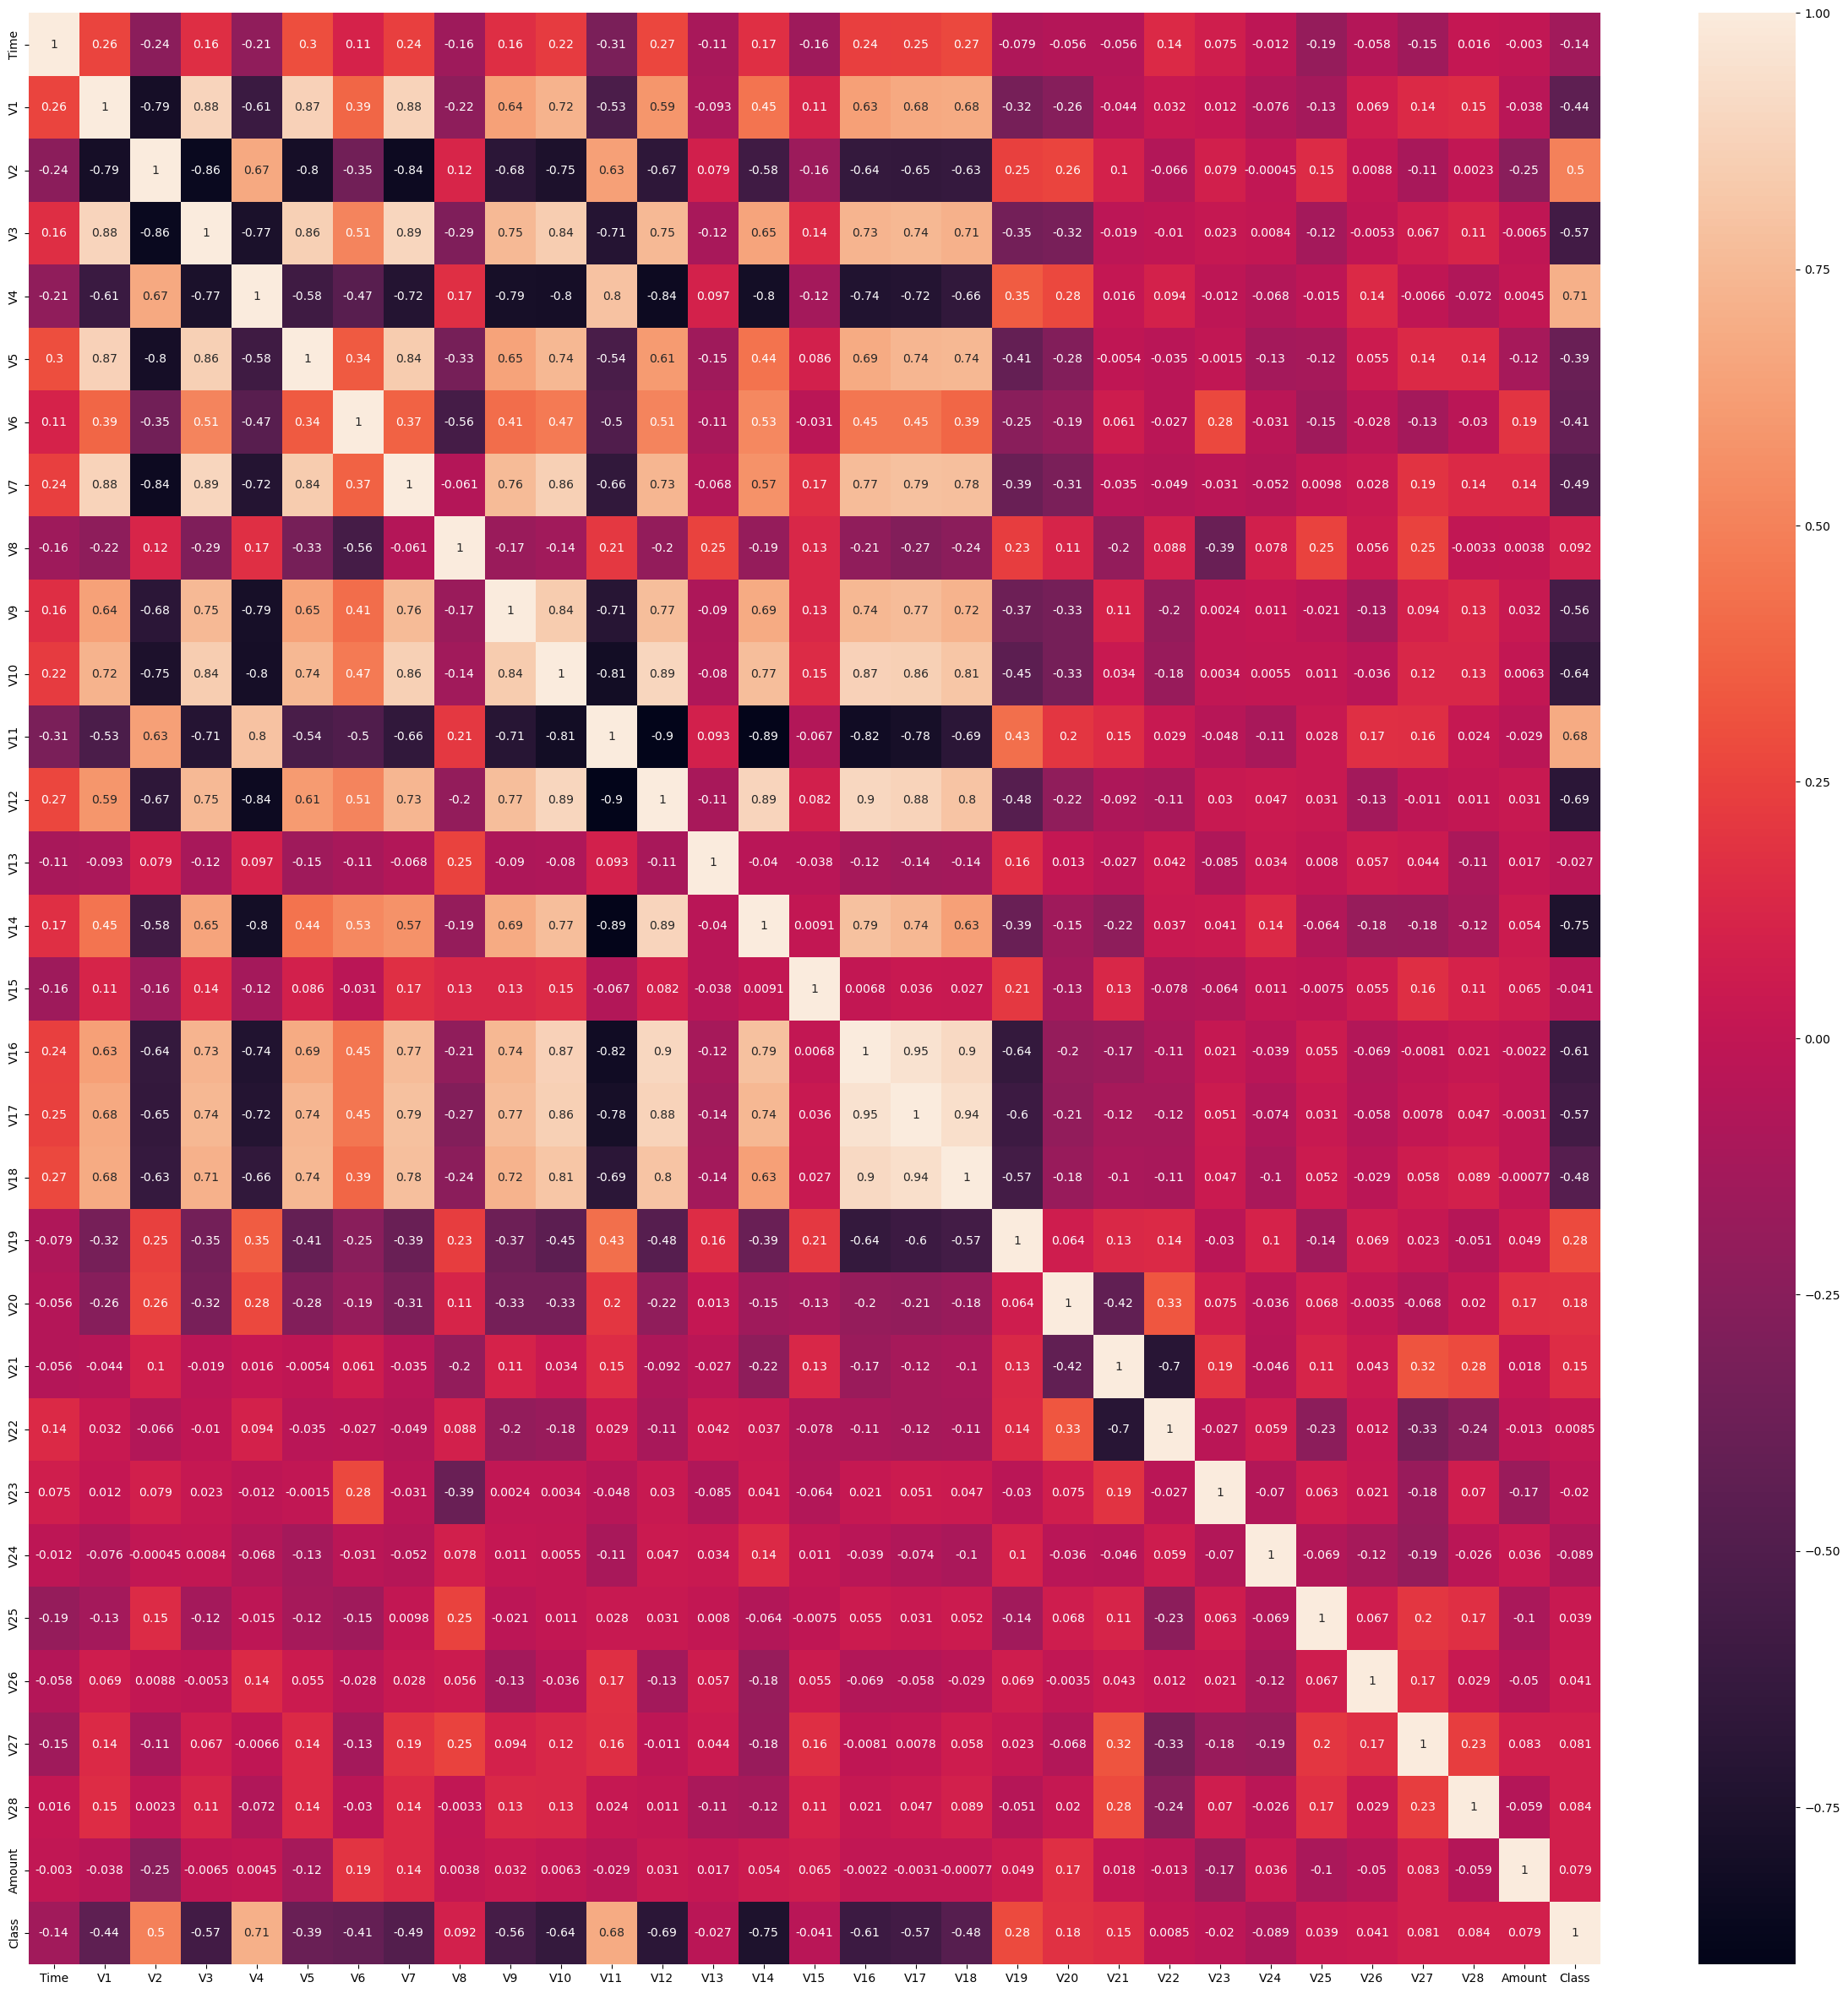

In [329]:
plt.figure(figsize=(30,30))
sns.heatmap(train_data_scaled_oversample.corr(), annot=True)

In [330]:
train_scaled_oversample_X

Time        V1        V2        V3        V4        V5        V6  \
0       1.207885 -0.163196  0.996718  0.272575  3.151543  0.566564 -0.048622   
1      -1.944612  0.596357  0.139330  0.255694  0.519636 -0.300602 -0.601515   
2       1.235471  0.732197 -0.842745 -0.991870  0.221469 -0.355919 -0.279404   
3       0.727870 -0.137808  0.460537  0.189594  0.376144  0.603503  0.846579   
4      -0.531583  0.430428 -0.990731  0.493000 -0.338596 -1.201509  0.075732   
...          ...       ...       ...       ...       ...       ...       ...   
454925 -0.619711 -1.492744  0.923413 -1.990934  2.323166 -4.169945  1.665037   
454926  0.736904  0.777090 -0.314557 -1.702675  0.547185  0.149772 -1.074123   
454927 -1.119605 -1.654260  1.803495 -2.745133  2.732691 -2.641023 -0.094779   
454928  1.256719 -3.768610 -4.510985 -3.097299  2.633328  4.490730 -4.808539   
454929 -0.881903  0.529250  0.246609  0.499723  2.233136 -0.411610  0.151757   

              V7        V8        V9  ...       V20       V21       V22  \
0       0.773587 -0.138502 -1.663719  ...  0.136445  0.450184  1.519434   
1      -0.012152 -0.042383  0.097751  ... -0.186151 -0.326135 -0.987732   
2       0.144288 -0.042090  1.011020  ...  0.346393  0.036083 -0.641667   
3       0.671691  0.119942 -0.407404  ... -0.011839  0.130216  0.473227   
4      -0.744301  0.091956 -0.327181  ...  0.797758  0.670228  1.210476   
...          ...       ...       ...  ...       ...       ...       ...   
454925 -0.412254 -2.988606 -0.925327  ... -0.579875 -0.696584 -0.169111   
454926  0.611928 -0.372100  0.908332  ...  0.468489  0.026751 -0.291688   
454927 -3.835391 -0.054700 -1.973700  ... -0.290617  3.541675  0.319567   
454928 -4.713840  1.220056 -0.588189  ...  3.804213  1.601822 -1.348617   
454929 -0.557602  0.344438  0.306536  ... -0.284673 -0.068218  0.170540   

             V23       V24       V25       V26       V27       V28    Amount  
0      -0.556936  0.100126 -0.342432  1.407369  0.375270  0.796794 -0.274387  
1       0.316016  0.564909  0.139782  0.217729 -0.031450  0.094562 -0.301294  
2      -0.132284 -0.805281 -0.443623 -0.216063 -0.235106 -0.066971  0.872584  
3      -0.157339 -0.628245 -0.749343 -1.233947  0.339701  0.511680 -0.013392  
4      -0.612650  0.102861  0.721398 -0.145632 -0.006938  0.171220  0.710501  
...          ...       ...       ...       ...       ...       ...       ...  
454925 -6.867765  0.930901 -1.821395 -0.424142  3.741545 -0.983711  5.061179  
454926 -0.396266 -0.461444  0.459729 -1.054273 -0.038529  0.126879  0.750922  
454927 -0.058434  0.070404 -0.840878 -0.260917  1.043773  0.009531  0.335721  
454928 -0.445714 -1.049910  0.236994  0.839294  1.746430 -3.726314 -0.213296  
454929 -0.212292  0.578276  0.973957  0.393220  0.151167  0.191289 -0.350191  

[454930 rows x 30 columns]

In [331]:
train_scaled_oversample_X, test_scaled_oversample_X,train_oversample_y, test_oversample_y = train_test_split(train_scaled_oversample_X, train_y_oversample, test_size=0.2, random_state=32)

In [332]:
train_scaled_oversample_X.shape, test_scaled_oversample_X.shape, train_oversample_y.shape, test_oversample_y.shape

((363944, 30), (90986, 30), (363944,), (90986,))

Train Accuracy :  1.0
Test Accuracy :  0.9998131580682742
Train Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00    181839
           1       1.00      1.00      1.00    182105

    accuracy                           1.00    363944
   macro avg       1.00      1.00      1.00    363944
weighted avg       1.00      1.00      1.00    363944

Test Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00     45626
           1       1.00      1.00      1.00     45360

    accuracy                           1.00     90986
   macro avg       1.00      1.00      1.00     90986
weighted avg       1.00      1.00      1.00     90986

Train Confusion. Matrix : 
 [[181839      0]
 [     0 182105]]
Test Confusion. Matrix  : 
 [[45609    17]
 [    0 45360]]
TRAIN ROC AUC SCORE  : 
 1.0
Test ROC AUC SCORE  : 
 0.9998137027133651


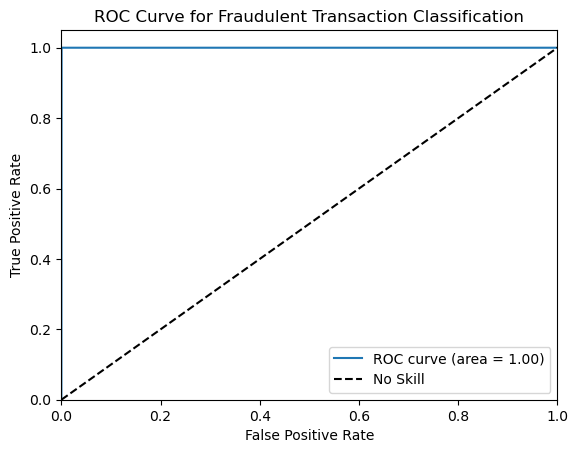

CPU times: user 7.33 s, sys: 119 ms, total: 7.45 s
Wall time: 7.46 s


In [333]:
%%time
decision_unbalanced_model = DecisionTreeClassifier()
train_accuracy, test_accuracy = model_pred_result(train_scaled_oversample_X, test_scaled_oversample_X, train_oversample_y, test_oversample_y, decision_unbalanced_model)

In [475]:
train_scaled_oversample_X.shape, test_scaled_oversample_X.shape, train_oversample_y.shape, test_oversample_y.shape

((36394, 30), (9099, 30), (36394,), (9099,))

Train Accuracy :  1.0
Test Accuracy :  0.9999340557888027
Train Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00    181839
           1       1.00      1.00      1.00    182105

    accuracy                           1.00    363944
   macro avg       1.00      1.00      1.00    363944
weighted avg       1.00      1.00      1.00    363944

Test Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00     45626
           1       1.00      1.00      1.00     45360

    accuracy                           1.00     90986
   macro avg       1.00      1.00      1.00     90986
weighted avg       1.00      1.00      1.00     90986

Train Confusion. Matrix : 
 [[181839      0]
 [     0 182105]]
Test Confusion. Matrix  : 
 [[45620     6]
 [    0 45360]]
TRAIN ROC AUC SCORE  : 
 1.0
Test ROC AUC SCORE  : 
 0.9999342480164819


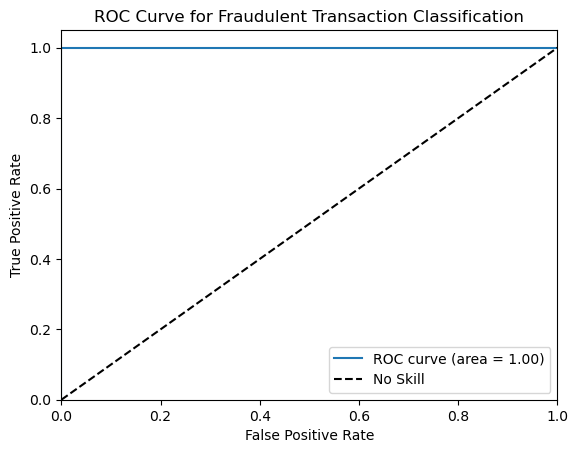

CPU times: user 1min 22s, sys: 640 ms, total: 1min 23s
Wall time: 1min 24s


In [334]:
%%time
random_balanced_model = RandomForestClassifier()
train_accuracy, test_accuracy = model_pred_result(train_scaled_oversample_X, test_scaled_oversample_X, train_oversample_y, test_oversample_y, random_balanced_model)

In [335]:
pd.Series(random_balanced_model.feature_importances_,index= random_balanced_model.feature_names_in_).sort_values(ascending=False)[:10].index

Index(['V14', 'V10', 'V12', 'V4', 'V17', 'V11', 'V16', 'V3', 'V7', 'V2'], dtype='object')

In [373]:
random_balanced_model.feature_names_in_

array(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'Amount'], dtype=object)

In [377]:
train_scaled_oversample_X.shape,train_oversample_y.shape,

((363944, 30), (363944,))

In [379]:
train_data_scaled_oversample.shape

(454930, 31)

In [432]:
resize_df = train_data_scaled_oversample.sample(frac=0.10,random_state=42)

In [387]:
resize_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [434]:
resize_df['Class'].value_counts()

Class
1    22822
0    22671
Name: count, dtype: int64

In [436]:
train_scaled_oversample_X = resize_df.drop(columns='Class')
train_oversample_y=resize_df['Class']

In [438]:
train_scaled_oversample_X, test_scaled_oversample_X,train_oversample_y, test_oversample_y = train_test_split(train_scaled_oversample_X, train_oversample_y, test_size=0.2, random_state=32)

In [440]:
train_scaled_oversample_X.shape, test_scaled_oversample_X.shape,train_oversample_y.shape, test_oversample_y.shape

((36394, 30), (9099, 30), (36394,), (9099,))

In [482]:

param_grid = {
    'n_estimators' : [50, 100, 150, 200, 250],
    'criterion' : ['gini','entropy'],
    'max_depth' : [4,6,8,10],
    'class_weight' : [None, "balanced"]
}

grid = GridSearchCV(estimator = random_balanced_model, param_grid=param_grid, cv= 10, verbose=2, scoring='f1')

In [484]:
%%time
grid.fit(train_scaled_oversample_X, train_oversample_y)

Fitting 10 folds for each of 80 candidates, totalling 800 fits
[CV] END class_weight=None, criterion=gini, max_depth=4, n_estimators=50; total time=   1.4s
[CV] END class_weight=None, criterion=gini, max_depth=4, n_estimators=50; total time=   1.3s
[CV] END class_weight=None, criterion=gini, max_depth=4, n_estimators=50; total time=   1.4s
[CV] END class_weight=None, criterion=gini, max_depth=4, n_estimators=50; total time=   1.4s
[CV] END class_weight=None, criterion=gini, max_depth=4, n_estimators=50; total time=   1.4s
[CV] END class_weight=None, criterion=gini, max_depth=4, n_estimators=50; total time=   1.3s
[CV] END class_weight=None, criterion=gini, max_depth=4, n_estimators=50; total time=   1.4s
[CV] END class_weight=None, criterion=gini, max_depth=4, n_estimators=50; total time=   1.4s
[CV] END class_weight=None, criterion=gini, max_depth=4, n_estimators=50; total time=   1.4s
[CV] END class_weight=None, criterion=gini, max_depth=4, n_estimators=50; total time=   1.4s
[CV] EN

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [50, 100, 150, 200, 250]},
             scoring='f1', verbose=2)

Train Accuracy :  0.9552673517612793
Test Accuracy :  0.9538410814375206
Train Report:                precision    recall  f1-score   support

           0       0.93      0.98      0.96     18157
           1       0.98      0.93      0.95     18237

    accuracy                           0.96     36394
   macro avg       0.96      0.96      0.96     36394
weighted avg       0.96      0.96      0.96     36394

Test Report:                precision    recall  f1-score   support

           0       0.94      0.97      0.95      4514
           1       0.97      0.93      0.95      4585

    accuracy                           0.95      9099
   macro avg       0.95      0.95      0.95      9099
weighted avg       0.95      0.95      0.95      9099

Train Confusion. Matrix : 
 [[17766   391]
 [ 1237 17000]]
Test Confusion. Matrix  : 
 [[4396  118]
 [ 302 4283]]
TRAIN ROC AUC SCORE  : 
 0.9553182334935605
Test ROC AUC SCORE  : 
 0.9539960737683175


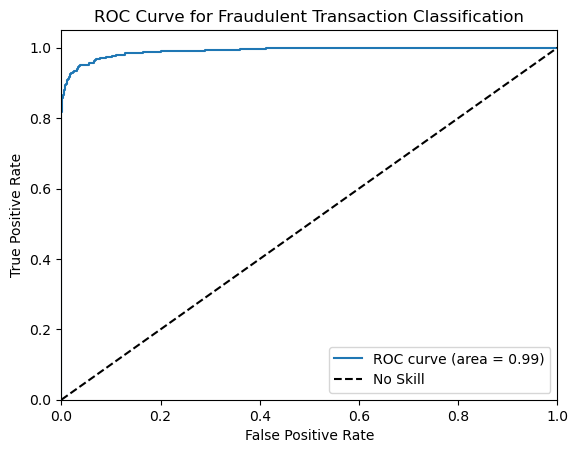

CPU times: user 179 ms, sys: 21.8 ms, total: 200 ms
Wall time: 172 ms


In [500]:
%%time
lgs_reg_model = LogisticRegression(penalty='l2')
train_accuracy, test_accuracy = model_pred_result(train_scaled_oversample_X, test_scaled_oversample_X,train_oversample_y, test_oversample_y, lgs_reg_model)

In [502]:
%%time
lgs_reg_model = LogisticRegression(penalty='elasticnet')
train_accuracy, test_accuracy = model_pred_result(train_scaled_oversample_X, test_scaled_oversample_X,train_oversample_y, test_oversample_y, lgs_reg_model)

ValueError: Solver lbfgs supports only 'l2' or None penalties, got elasticnet penalty.

Train Accuracy :  0.9539484530417102
Test Accuracy :  0.9529618639410924
Train Report:                precision    recall  f1-score   support

           0       0.93      0.98      0.95     18157
           1       0.98      0.93      0.95     18237

    accuracy                           0.95     36394
   macro avg       0.96      0.95      0.95     36394
weighted avg       0.96      0.95      0.95     36394

Test Report:                precision    recall  f1-score   support

           0       0.93      0.97      0.95      4514
           1       0.97      0.93      0.95      4585

    accuracy                           0.95      9099
   macro avg       0.95      0.95      0.95      9099
weighted avg       0.95      0.95      0.95      9099

Train Confusion. Matrix : 
 [[17770   387]
 [ 1289 16948]]
Test Confusion. Matrix  : 
 [[4398  116]
 [ 312 4273]]
TRAIN ROC AUC SCORE  : 
 0.9540027107665998
Test ROC AUC SCORE  : 
 0.9531270942358415


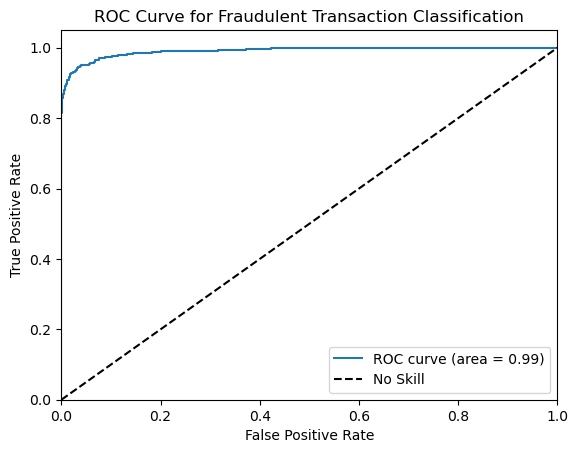

CPU times: user 1.21 s, sys: 40.7 ms, total: 1.25 s
Wall time: 1.28 s


In [509]:
%%time
lgs_reg_model = LogisticRegression(penalty='l1',solver='saga')
train_accuracy, test_accuracy = model_pred_result(train_scaled_oversample_X, test_scaled_oversample_X,train_oversample_y, test_oversample_y, lgs_reg_model)

In [519]:
%%time
lgs_reg_model = LogisticRegression(penalty='elasticnet',solver='saga')
train_accuracy, test_accuracy = model_pred_result(train_scaled_oversample_X, test_scaled_oversample_X,train_oversample_y, test_oversample_y, lgs_reg_model)

ValueError: l1_ratio must be specified when penalty is elasticnet.

Train Accuracy :  0.9539484530417102
Test Accuracy :  0.9529618639410924
Train Report:                precision    recall  f1-score   support

           0       0.93      0.98      0.95     18157
           1       0.98      0.93      0.95     18237

    accuracy                           0.95     36394
   macro avg       0.96      0.95      0.95     36394
weighted avg       0.96      0.95      0.95     36394

Test Report:                precision    recall  f1-score   support

           0       0.93      0.97      0.95      4514
           1       0.97      0.93      0.95      4585

    accuracy                           0.95      9099
   macro avg       0.95      0.95      0.95      9099
weighted avg       0.95      0.95      0.95      9099

Train Confusion. Matrix : 
 [[17770   387]
 [ 1289 16948]]
Test Confusion. Matrix  : 
 [[4398  116]
 [ 312 4273]]
TRAIN ROC AUC SCORE  : 
 0.9540027107665998
Test ROC AUC SCORE  : 
 0.9531270942358415


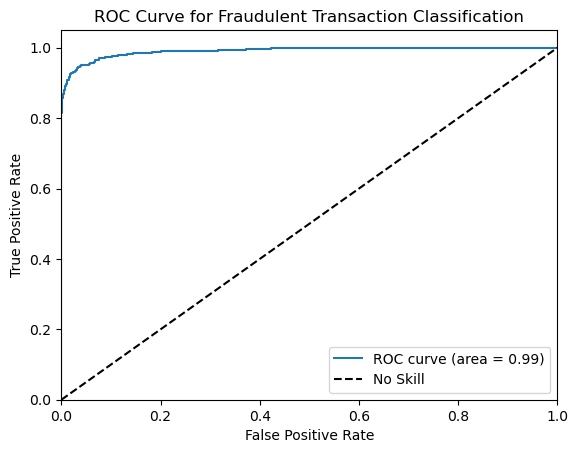

CPU times: user 1.23 s, sys: 49.5 ms, total: 1.28 s
Wall time: 1.33 s


In [521]:
%%time
lgs_reg_model = LogisticRegression(penalty='elasticnet',solver='saga',l1_ratio=0.5)
train_accuracy, test_accuracy = model_pred_result(train_scaled_oversample_X, test_scaled_oversample_X,train_oversample_y, test_oversample_y, lgs_reg_model)

In [526]:
train_scaled_oversample_X.shape, test_scaled_oversample_X.shape,train_oversample_y.shape, test_oversample_y.shape

((36394, 30), (9099, 30), (36394,), (9099,))

Train Accuracy :  0.998131560147277
Test Accuracy :  0.9974722496977689
Train Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00     18157
           1       1.00      1.00      1.00     18237

    accuracy                           1.00     36394
   macro avg       1.00      1.00      1.00     36394
weighted avg       1.00      1.00      1.00     36394

Test Report:                precision    recall  f1-score   support

           0       1.00      0.99      1.00      4514
           1       1.00      1.00      1.00      4585

    accuracy                           1.00      9099
   macro avg       1.00      1.00      1.00      9099
weighted avg       1.00      1.00      1.00      9099

Train Confusion. Matrix : 
 [[18089    68]
 [    0 18237]]
Test Confusion. Matrix  : 
 [[4491   23]
 [   0 4585]]
TRAIN ROC AUC SCORE  : 
 0.9981274439610068
Test ROC AUC SCORE  : 
 0.99745237040319


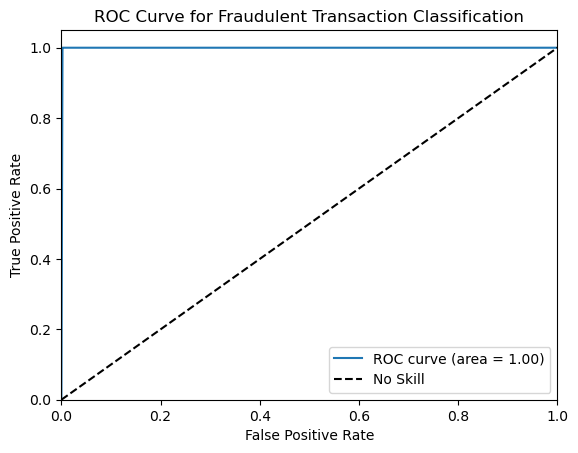

CPU times: user 1h 32min 28s, sys: 23.3 s, total: 1h 32min 51s
Wall time: 10min 34s


In [523]:
%%time
knn_cls_model = KNeighborsClassifier()
train_accuracy, test_accuracy = model_pred_result(train_scaled_oversample_X, test_scaled_oversample_X,train_oversample_y, test_oversample_y, knn_cls_model)

In [ ]:
KNeighborsClassifier()

In [488]:
rdmfrst_usos_model = RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10)

Train Accuracy :  0.9989009177336924
Test Accuracy :  0.9980217606330366
Train Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00     18157
           1       1.00      1.00      1.00     18237

    accuracy                           1.00     36394
   macro avg       1.00      1.00      1.00     36394
weighted avg       1.00      1.00      1.00     36394

Test Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00      4514
           1       1.00      1.00      1.00      4585

    accuracy                           1.00      9099
   macro avg       1.00      1.00      1.00      9099
weighted avg       1.00      1.00      1.00      9099

Train Confusion. Matrix : 
 [[18156     1]
 [   39 18198]]
Test Confusion. Matrix  : 
 [[4511    3]
 [  15 4570]]
TRAIN ROC AUC SCORE  : 
 0.9989032075995445
Test ROC AUC SCORE  : 
 0.9980319316760313


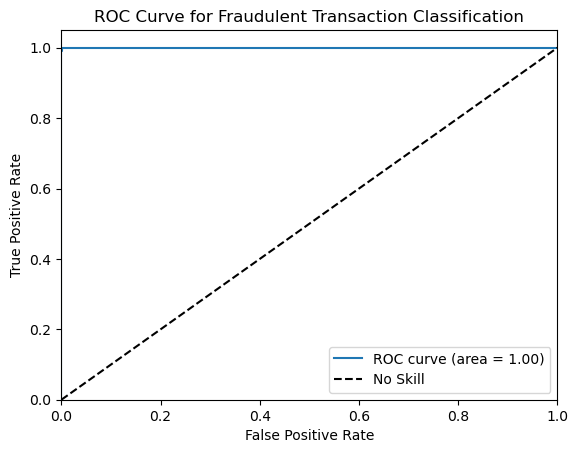

CPU times: user 6.4 s, sys: 108 ms, total: 6.51 s
Wall time: 6.7 s


In [492]:
%%time
train_accuracy, test_accuracy = model_pred_result(train_scaled_oversample_X, test_scaled_oversample_X,train_oversample_y, test_oversample_y, rdmfrst_usos_model)

In [367]:
param_grid = {
    'n_estimators' : [50, 100, 150, 200, 250, 300],
    'criterion' : ['gini','entropy'],
    'max_depth' : [1,2,3,4,5,6,7,8,9,10],
    'class_weight' : [None, "balanced"]
}

grid = GridSearchCV(estimator = random_balanced_model, param_grid=param_grid, cv= 5, verbose=2, scoring='f1')

In [369]:
%%time
grid.fit(train_scaled_oversample_X, train_oversample_y)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV] END class_weight=None, criterion=gini, max_depth=1, n_estimators=50; total time=   5.0s
[CV] END class_weight=None, criterion=gini, max_depth=1, n_estimators=50; total time=   5.0s
[CV] END class_weight=None, criterion=gini, max_depth=1, n_estimators=50; total time=   4.9s
[CV] END class_weight=None, criterion=gini, max_depth=1, n_estimators=50; total time=   4.9s
[CV] END class_weight=None, criterion=gini, max_depth=1, n_estimators=50; total time=   5.0s
[CV] END class_weight=None, criterion=gini, max_depth=1, n_estimators=100; total time=   9.6s
[CV] END class_weight=None, criterion=gini, max_depth=1, n_estimators=100; total time=   9.7s
[CV] END class_weight=None, criterion=gini, max_depth=1, n_estimators=100; total time=  10.0s
[CV] END class_weight=None, criterion=gini, max_depth=1, n_estimators=100; total time=   9.6s
[CV] END class_weight=None, criterion=gini, max_depth=1, n_estimators=100; total time=   9.9s
[

KeyboardInterrupt: 

In [370]:
# param_grid = {
#     'n_estimators' : [50, 100, 150, 200, 250, 300],
#     'criterion' : ['gini','entropy'],
#     'max_depth' : [1,2,3,4,5,6,7,8,9,10],
#     'class_weight' : [None, "balanced"]
# }

# grid = RandomizedSearchCV(estimator = random_balanced_model, param_grid=param_grid, cv= 5, verbose=2, scoring='f1')


In [363]:

param_grid = {
    'n_estimators' : [50, 100, 150, 200, 250],
    'criterion' : ['gini','entropy'],
    'max_depth' : [4,6,8,10],
    'class_weight' : [ "balanced","unbalanced"]
}


rand_search = RandomizedSearchCV(estimator = random_balanced_model, param_distributions=param_grid, cv= 5, verbose=2, scoring='f1')


TypeError: RandomizedSearchCV.__init__() missing 2 required positional arguments: 'estimator' and 'param_distributions'

In [ ]:
%%time
rand_search.fit(train_scaled_oversample_X, train_oversample_y)

In [ ]:
pd.Series(random_balanced_model.feature_importances_,index= random_balanced_model.feature_names_in_).sort_values(ascending=False)[:10].plot(kind = 'bar')

In [ ]:
top_feature = pd.Series(random_balanced_model.feature_importances_,index= random_balanced_model.feature_names_in_).sort_values(ascending=False)[:10].index.values

In [ ]:
top_feature

In [ ]:
train_accuracy, test_accuracy = model_pred_result(train_scaled_oversample_X[top_feature], test_scaled_oversample_X[top_feature], train_oversample_y, test_oversample_y, random_balanced_model)

In [ ]:
model = GradientBoostingClassifier(n_estimators = 500)

In [ ]:
%%time
model = AdaBoostClassifier(n_estimators=200)
train_accuracy, test_accuracy = model_pred_result(train_scaled_oversample_X[top_feature], test_scaled_oversample_X[top_feature], train_oversample_y, test_oversample_y, model)


In [ ]:
%%time
model = LogisticRegression()
train_accuracy, test_accuracy = model_pred_result(train_scaled_oversample_X, test_scaled_oversample_X, train_oversample_y, test_oversample_y, model)


In [ ]:
%%time
model = LogisticRegression()
train_accuracy, test_accuracy = model_pred_result(train_scaled_oversample_X[top_feature], test_scaled_oversample_X[top_feature], train_oversample_y, test_oversample_y, model)


In [ ]:
%%time
model = GradientBoostingClassifier(n_estimators = 500)
train_accuracy, test_accuracy = model_pred_result(train_scaled_oversample_X, test_scaled_oversample_X, train_oversample_y, test_oversample_y, model)


In [ ]:
clf = xgb.XGBClassifier(eval_metric='auc')

In [ ]:
%%time
train_accuracy, test_accuracy = model_pred_result(train_scaled_oversample_X, test_scaled_oversample_X, train_oversample_y, test_oversample_y, clf)

In [ ]:
clf1 = RandomForestClassifier()
clf2 = GradientBoostingClassifier() 
clf3 = AdaBoostClassifier()
clf4 = xgb.XGBClassifier(eval_metric='auc')

voting_model = VotingClassifier(estimators=[('rf', clf1), ('gbm', clf2), ('ada', clf3), ('xgb', clf4)], voting='soft')


In [ ]:
%%time
train_accuracy, test_accuracy = model_pred_result(train_scaled_oversample_X, test_scaled_oversample_X, train_oversample_y, test_oversample_y, voting_model)

In [ ]:
estimators = [
    ('rf1', RandomForestClassifier()),
    ('gbm', GradientBoostingClassifier()),
    ('ada', AdaBoostClassifier(n_estimators=200)),
    ( 'xgb',xgb.XGBClassifier(eval_metric='auc')),
     ('voting',voting_model)
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

In [ ]:
%%time
train_accuracy, test_accuracy = model_pred_result(train_scaled_oversample_X, test_scaled_oversample_X, train_oversample_y, test_oversample_y, voting_model)

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [ ]:
# train_accuracy, test_accuracy = model_pred_result(train_scaled_oversample_X, test_scaled_oversample_X, train_oversample_y, test_oversample_y, random_balanced_model)